=================================================================================
CREDIT CARD DEFAULT PREDICTION - ENHANCED ML & DL APPROACH
=================================================================================
Project: P4DSAI Mega Project
Based on: Bhandary & Ghosh (2025) - JRFM Paper
Dataset: UCI Credit Card Default Dataset (30,000 records)
Category: Finance & Commerce

Part 1: Setup, Data Loading & Exploratory Data Analysis
=================================================================================

✅ Libraries imported successfully!
Pandas version: 2.2.2
NumPy version: 2.0.2
Mounted at /content/drive

📂 Loading dataset from Google Drive...
✅ Dataset loaded successfully!
📊 Dataset shape: (30000, 25)

📋 INITIAL DATA INSPECTION

🔍 First 5 rows:
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2       3913       3102        689          0          0   
1      0      2       2682       1725       2682       3272       3455   
2      0      0      29239      14027      13559      1

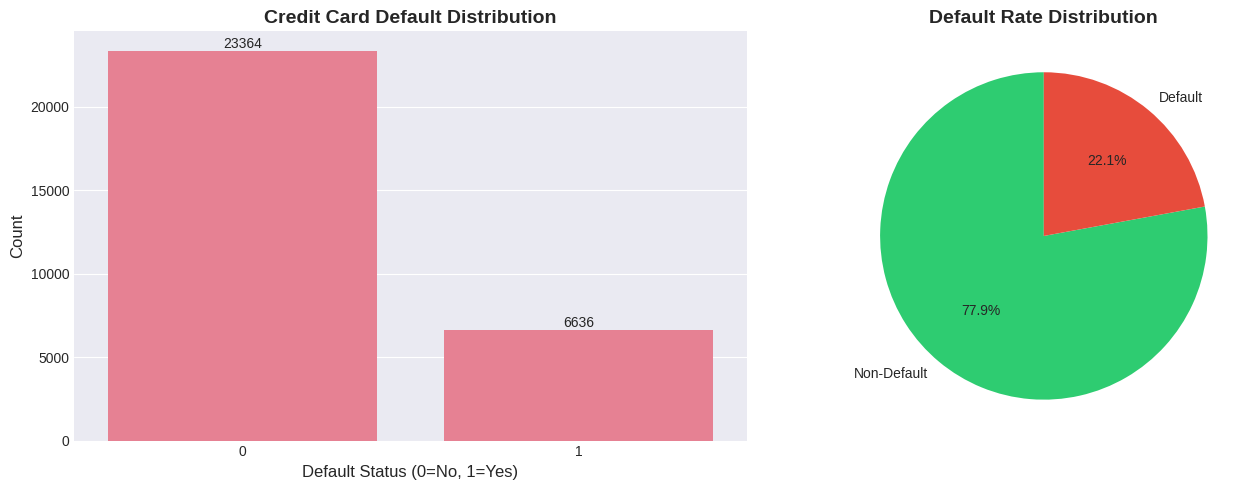


📊 FEATURE OVERVIEW

📌 Demographic Features (5):
['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']

📌 Payment Status Features (12):
['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

📌 Bill Amount Features (6):
['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

📌 Payment Amount Features (6):
['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

👥 DEMOGRAPHIC FEATURES ANALYSIS


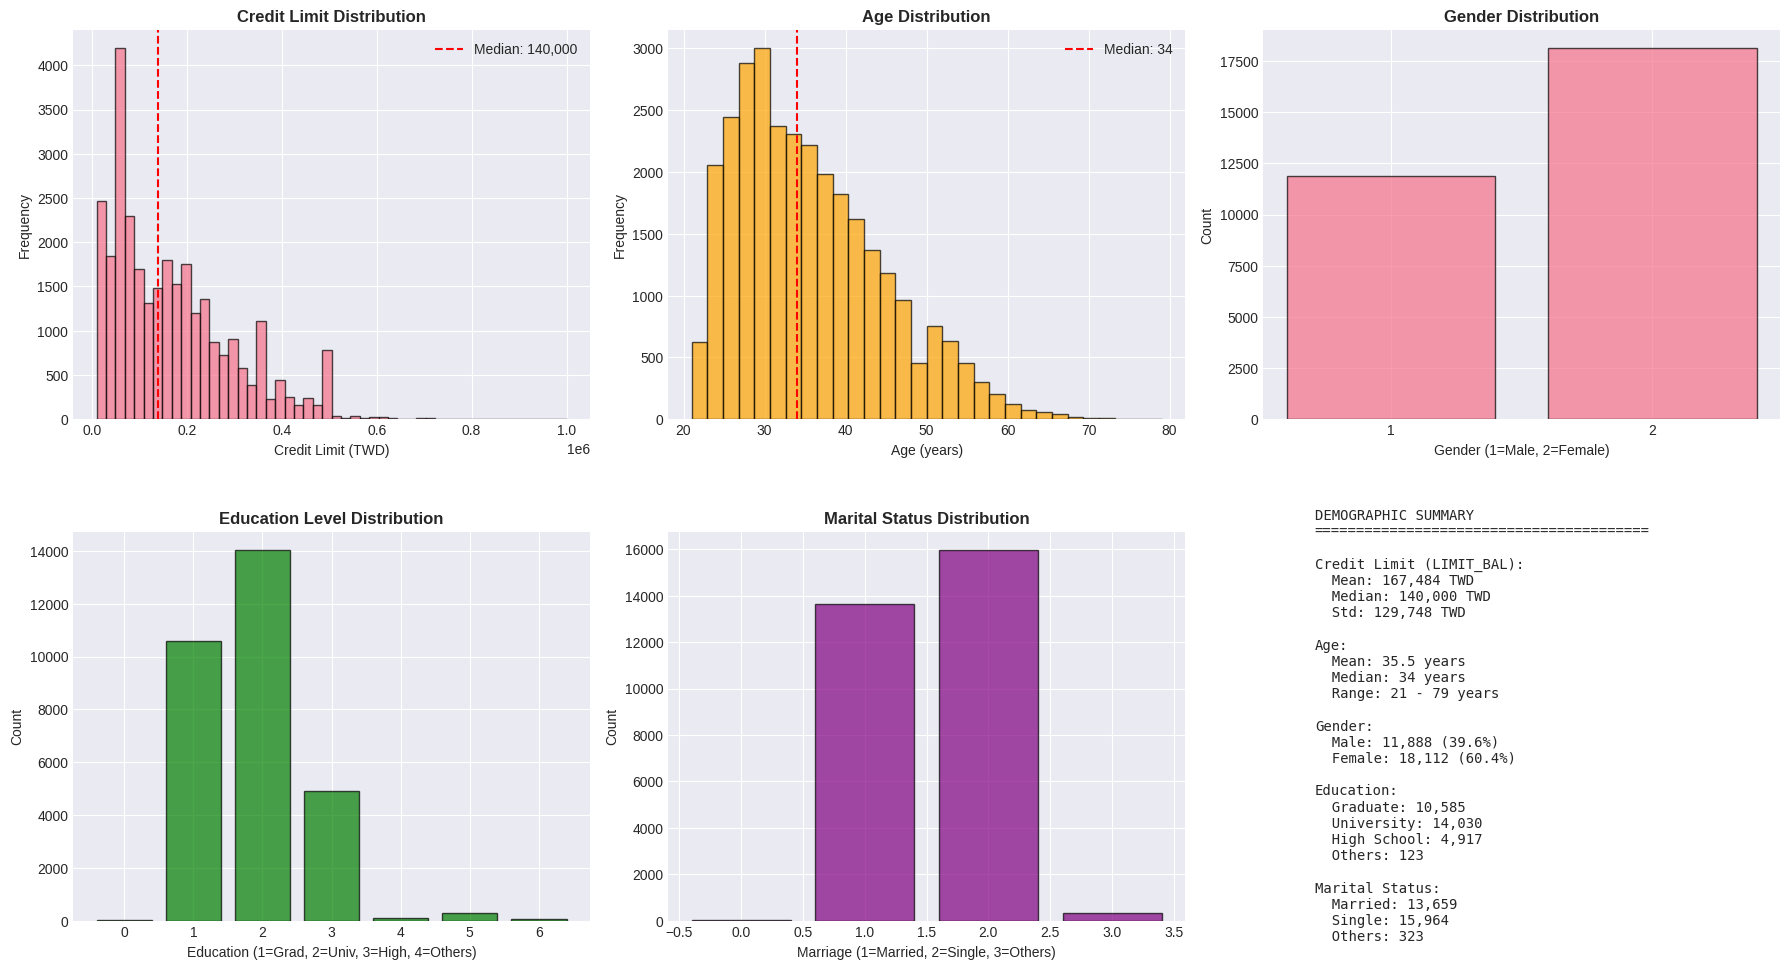


💾 SAVING CLEANED DATA
✅ Cleaned data saved to: /content/drive/MyDrive/credit_card_cleaned.csv

✨ PART 1 COMPLETED SUCCESSFULLY!

📋 Summary:
   • Dataset shape: (30000, 24)
   • Features: 23
   • Default rate: 22.12%
   • No missing values: ✅
   • No duplicates: ✅

🎯 Ready for Part 2: Feature Engineering & Correlation Analysis


In [ ]:
# ============================================================================
# 1. INSTALL & IMPORT REQUIRED LIBRARIES
# ============================================================================

# Install additional libraries if needed
!pip install -q xgboost shap imbalanced-learn

# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

print("✅ Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

# ============================================================================
# 2. MOUNT GOOGLE DRIVE & LOAD DATASET
# ============================================================================

from google.colab import drive
drive.mount('/content/drive')

# Load dataset from Google Drive
file_path = '/content/drive/MyDrive/default of credit card clients.xls'

print("\n📂 Loading dataset from Google Drive...")
try:
    # Read Excel file - skip first row if it's metadata
    df = pd.read_excel(file_path, header=1)  # header=1 skip first row
    print("✅ Dataset loaded successfully!")
    print(f"📊 Dataset shape: {df.shape}")
except Exception as e:
    print(f"❌ Error loading file: {e}")
    print("Please check your file path!")

# ============================================================================
# 3. INITIAL DATA INSPECTION
# ============================================================================

print("\n" + "="*80)
print("📋 INITIAL DATA INSPECTION")
print("="*80)

# Display first few rows
print("\n🔍 First 5 rows:")
print(df.head())

# Dataset info
print("\n📊 Dataset Information:")
print(df.info())

# Basic statistics
print("\n📈 Statistical Summary:")
print(df.describe())

# Check for missing values
print("\n🔍 Missing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✅ No missing values found!")
else:
    print(missing[missing > 0])

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n🔍 Duplicate rows: {duplicates}")
if duplicates == 0:
    print("✅ No duplicates found!")

# ============================================================================
# 4. DATA CLEANING & PREPARATION
# ============================================================================

print("\n" + "="*80)
print("🧹 DATA CLEANING")
print("="*80)

# Remove ID column if exists
if 'ID' in df.columns:
    df = df.drop('ID', axis=1)
    print("✅ ID column removed")

# Rename target variable for clarity
# The last column should be default payment next month
target_col = df.columns[-1]
df = df.rename(columns={target_col: 'default'})
print(f"✅ Target variable renamed to 'default'")

# Check column names
print(f"\n📋 Total features: {len(df.columns)-1}")
print(f"📋 Column names:\n{df.columns.tolist()}")

# ============================================================================
# 5. TARGET VARIABLE ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("🎯 TARGET VARIABLE ANALYSIS")
print("="*80)

# Target distribution
target_counts = df['default'].value_counts()
target_pct = df['default'].value_counts(normalize=True) * 100

print("\n📊 Default Distribution:")
print(f"Non-default (0): {target_counts[0]:,} ({target_pct[0]:.2f}%)")
print(f"Default (1):     {target_counts[1]:,} ({target_pct[1]:.2f}%)")
print(f"\n⚠️  Imbalance Ratio: {target_counts[0]/target_counts[1]:.2f}:1")

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='default', ax=axes[0])
axes[0].set_title('Credit Card Default Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Default Status (0=No, 1=Yes)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
for container in axes[0].containers:
    axes[0].bar_label(container)

# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(target_counts, labels=['Non-Default', 'Default'],
            autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Default Rate Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# 6. FEATURE OVERVIEW
# ============================================================================

print("\n" + "="*80)
print("📊 FEATURE OVERVIEW")
print("="*80)

# Separate features by type
demographic_features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
payment_features = [col for col in df.columns if col.startswith('PAY_')]
bill_features = [col for col in df.columns if col.startswith('BILL_AMT')]
payment_amt_features = [col for col in df.columns if col.startswith('PAY_AMT')]

print(f"\n📌 Demographic Features ({len(demographic_features)}):")
print(demographic_features)

print(f"\n📌 Payment Status Features ({len(payment_features)}):")
print(payment_features)

print(f"\n📌 Bill Amount Features ({len(bill_features)}):")
print(bill_features)

print(f"\n📌 Payment Amount Features ({len(payment_amt_features)}):")
print(payment_amt_features)

# ============================================================================
# 7. UNIVARIATE ANALYSIS - DEMOGRAPHIC FEATURES
# ============================================================================

print("\n" + "="*80)
print("👥 DEMOGRAPHIC FEATURES ANALYSIS")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# LIMIT_BAL distribution
axes[0].hist(df['LIMIT_BAL'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Credit Limit Distribution', fontweight='bold')
axes[0].set_xlabel('Credit Limit (TWD)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['LIMIT_BAL'].median(), color='red', linestyle='--',
                label=f'Median: {df["LIMIT_BAL"].median():,.0f}')
axes[0].legend()

# AGE distribution
axes[1].hist(df['AGE'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_title('Age Distribution', fontweight='bold')
axes[1].set_xlabel('Age (years)')
axes[1].set_ylabel('Frequency')
axes[1].axvline(df['AGE'].median(), color='red', linestyle='--',
                label=f'Median: {df["AGE"].median():.0f}')
axes[1].legend()

# SEX distribution
sex_counts = df['SEX'].value_counts()
axes[2].bar(sex_counts.index, sex_counts.values, edgecolor='black', alpha=0.7)
axes[2].set_title('Gender Distribution', fontweight='bold')
axes[2].set_xlabel('Gender (1=Male, 2=Female)')
axes[2].set_ylabel('Count')
axes[2].set_xticks([1, 2])

# EDUCATION distribution
edu_counts = df['EDUCATION'].value_counts().sort_index()
axes[3].bar(edu_counts.index, edu_counts.values, edgecolor='black', alpha=0.7, color='green')
axes[3].set_title('Education Level Distribution', fontweight='bold')
axes[3].set_xlabel('Education (1=Grad, 2=Univ, 3=High, 4=Others)')
axes[3].set_ylabel('Count')

# MARRIAGE distribution
marriage_counts = df['MARRIAGE'].value_counts().sort_index()
axes[4].bar(marriage_counts.index, marriage_counts.values, edgecolor='black', alpha=0.7, color='purple')
axes[4].set_title('Marital Status Distribution', fontweight='bold')
axes[4].set_xlabel('Marriage (1=Married, 2=Single, 3=Others)')
axes[4].set_ylabel('Count')

# Summary statistics
axes[5].axis('off')
summary_text = f"""
DEMOGRAPHIC SUMMARY
{'='*40}

Credit Limit (LIMIT_BAL):
  Mean: {df['LIMIT_BAL'].mean():,.0f} TWD
  Median: {df['LIMIT_BAL'].median():,.0f} TWD
  Std: {df['LIMIT_BAL'].std():,.0f} TWD

Age:
  Mean: {df['AGE'].mean():.1f} years
  Median: {df['AGE'].median():.0f} years
  Range: {df['AGE'].min():.0f} - {df['AGE'].max():.0f} years

Gender:
  Male: {(df['SEX']==1).sum():,} ({(df['SEX']==1).sum()/len(df)*100:.1f}%)
  Female: {(df['SEX']==2).sum():,} ({(df['SEX']==2).sum()/len(df)*100:.1f}%)

Education:
  Graduate: {(df['EDUCATION']==1).sum():,}
  University: {(df['EDUCATION']==2).sum():,}
  High School: {(df['EDUCATION']==3).sum():,}
  Others: {(df['EDUCATION']==4).sum():,}

Marital Status:
  Married: {(df['MARRIAGE']==1).sum():,}
  Single: {(df['MARRIAGE']==2).sum():,}
  Others: {(df['MARRIAGE']==3).sum():,}
"""
axes[5].text(0.1, 0.5, summary_text, fontsize=10, family='monospace',
             verticalalignment='center')

plt.tight_layout()
plt.show()

# ============================================================================
# 8. SAVE CLEANED DATA
# ============================================================================

print("\n" + "="*80)
print("💾 SAVING CLEANED DATA")
print("="*80)

# Save cleaned dataframe
output_path = '/content/drive/MyDrive/credit_card_cleaned.csv'
df.to_csv(output_path, index=False)
print(f"✅ Cleaned data saved to: {output_path}")

print("\n" + "="*80)
print("✨ PART 1 COMPLETED SUCCESSFULLY!")
print("="*80)
print("\n📋 Summary:")
print(f"   • Dataset shape: {df.shape}")
print(f"   • Features: {len(df.columns)-1}")
print(f"   • Default rate: {target_pct[1]:.2f}%")
print(f"   • No missing values: ✅")
print(f"   • No duplicates: ✅")
print("\n🎯 Ready for Part 2: Feature Engineering & Correlation Analysis")

=================================================================================
CREDIT CARD DEFAULT PREDICTION - PART 2
=================================================================================
Part 2: Feature Engineering & Correlation Analysis
=================================================================================


📂 LOADING CLEANED DATA FROM PART 1
✅ Data loaded successfully!
📊 Shape: (30000, 24)
📋 Columns: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']

🔧 FEATURE ENGINEERING
✅ New features created:
   • BILL_SUM
   • PAY_SUM
   • BILL_AVG
   • PAY_AVG
   • PAY_BILL_RATIO
   • CREDIT_UTIL_RATE
   • TOTAL_DELAYS
   • AVG_DELAY
   • PAYMENT_TREND

📊 Updated shape: (30000, 33)

💳 PAYMENT STATUS ANALYSIS


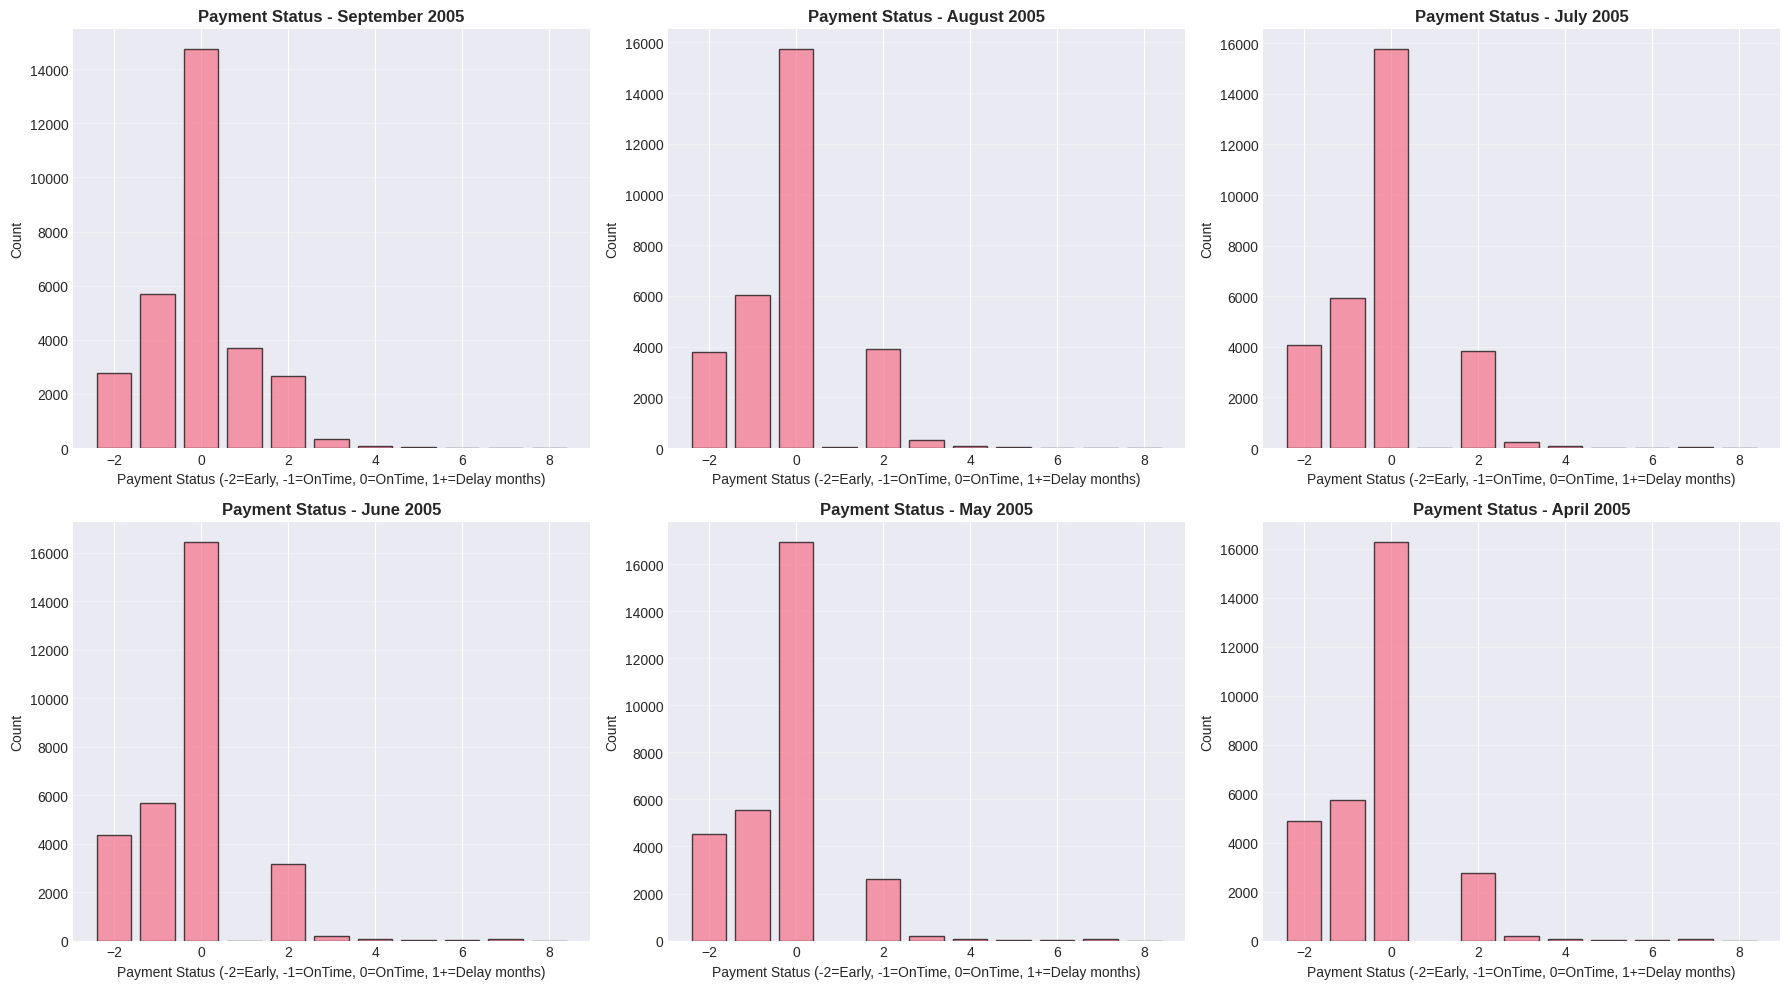


📊 Payment Delay Summary:
PAY_0: 6,818 delayed payments (22.73%)
PAY_2: 4,438 delayed payments (14.79%)
PAY_3: 4,213 delayed payments (14.04%)
PAY_4: 3,510 delayed payments (11.70%)
PAY_5: 2,968 delayed payments (9.89%)
PAY_6: 3,079 delayed payments (10.26%)

💰 BILL vs PAYMENT AMOUNT ANALYSIS


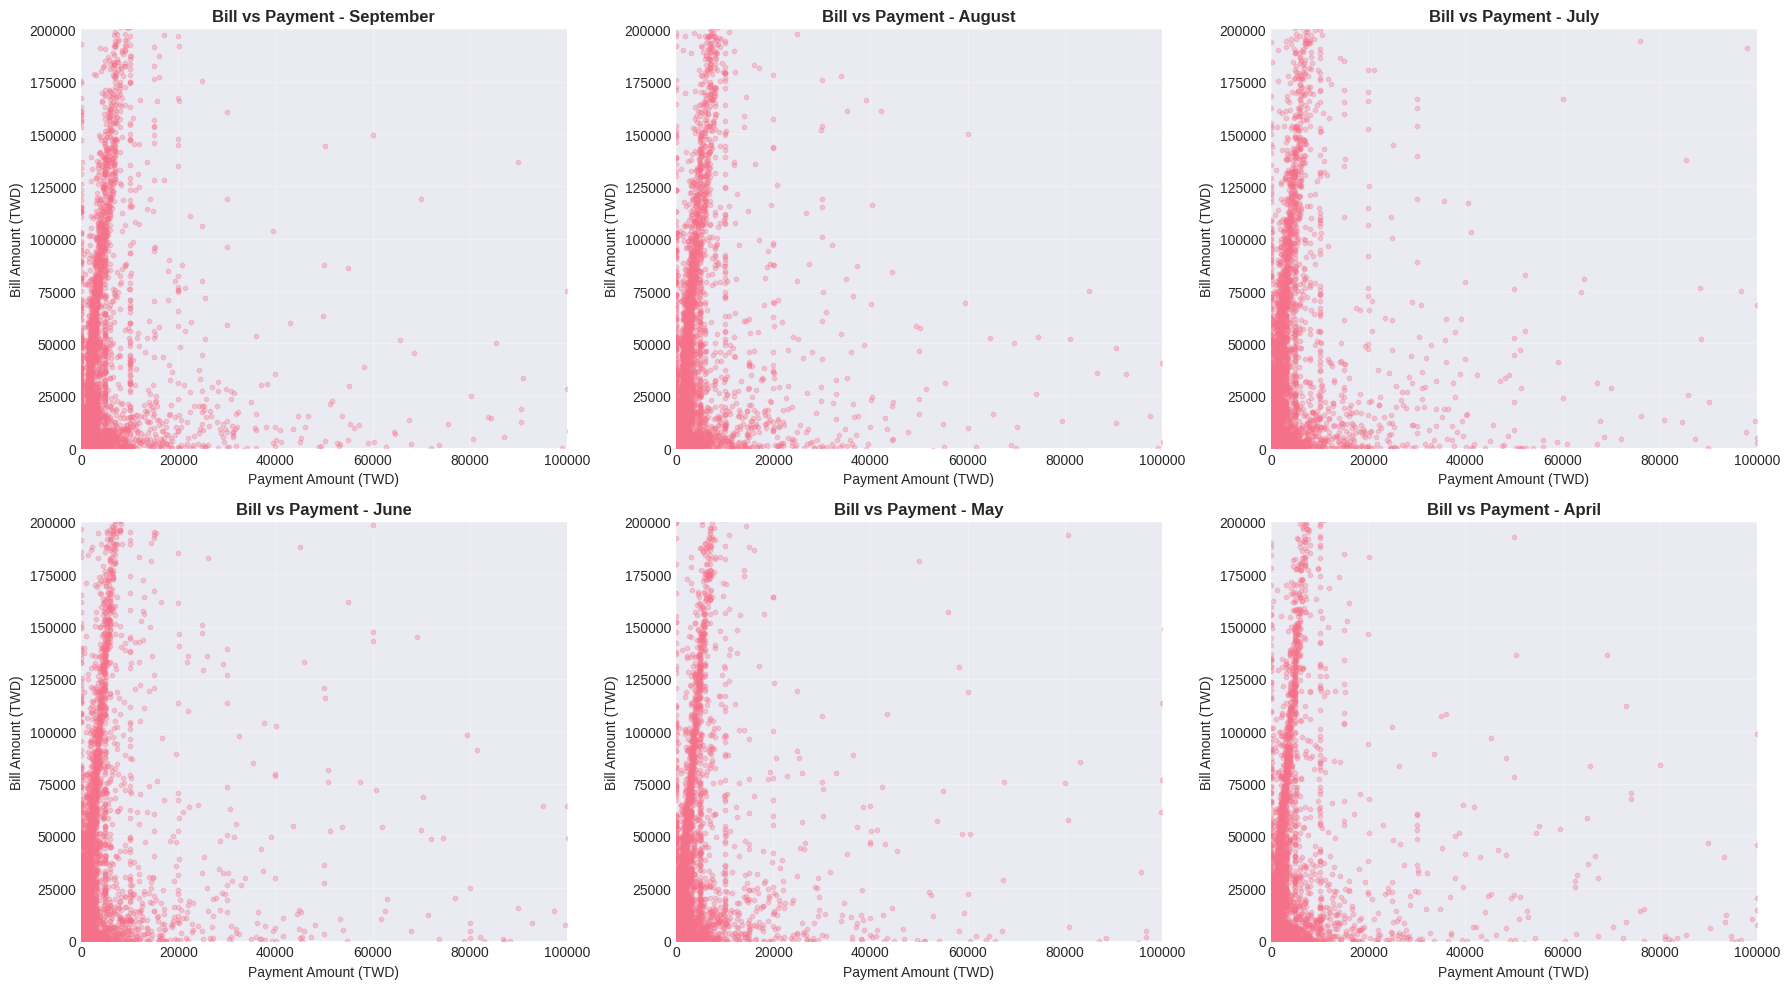


🔬 ENGINEERED FEATURES ANALYSIS


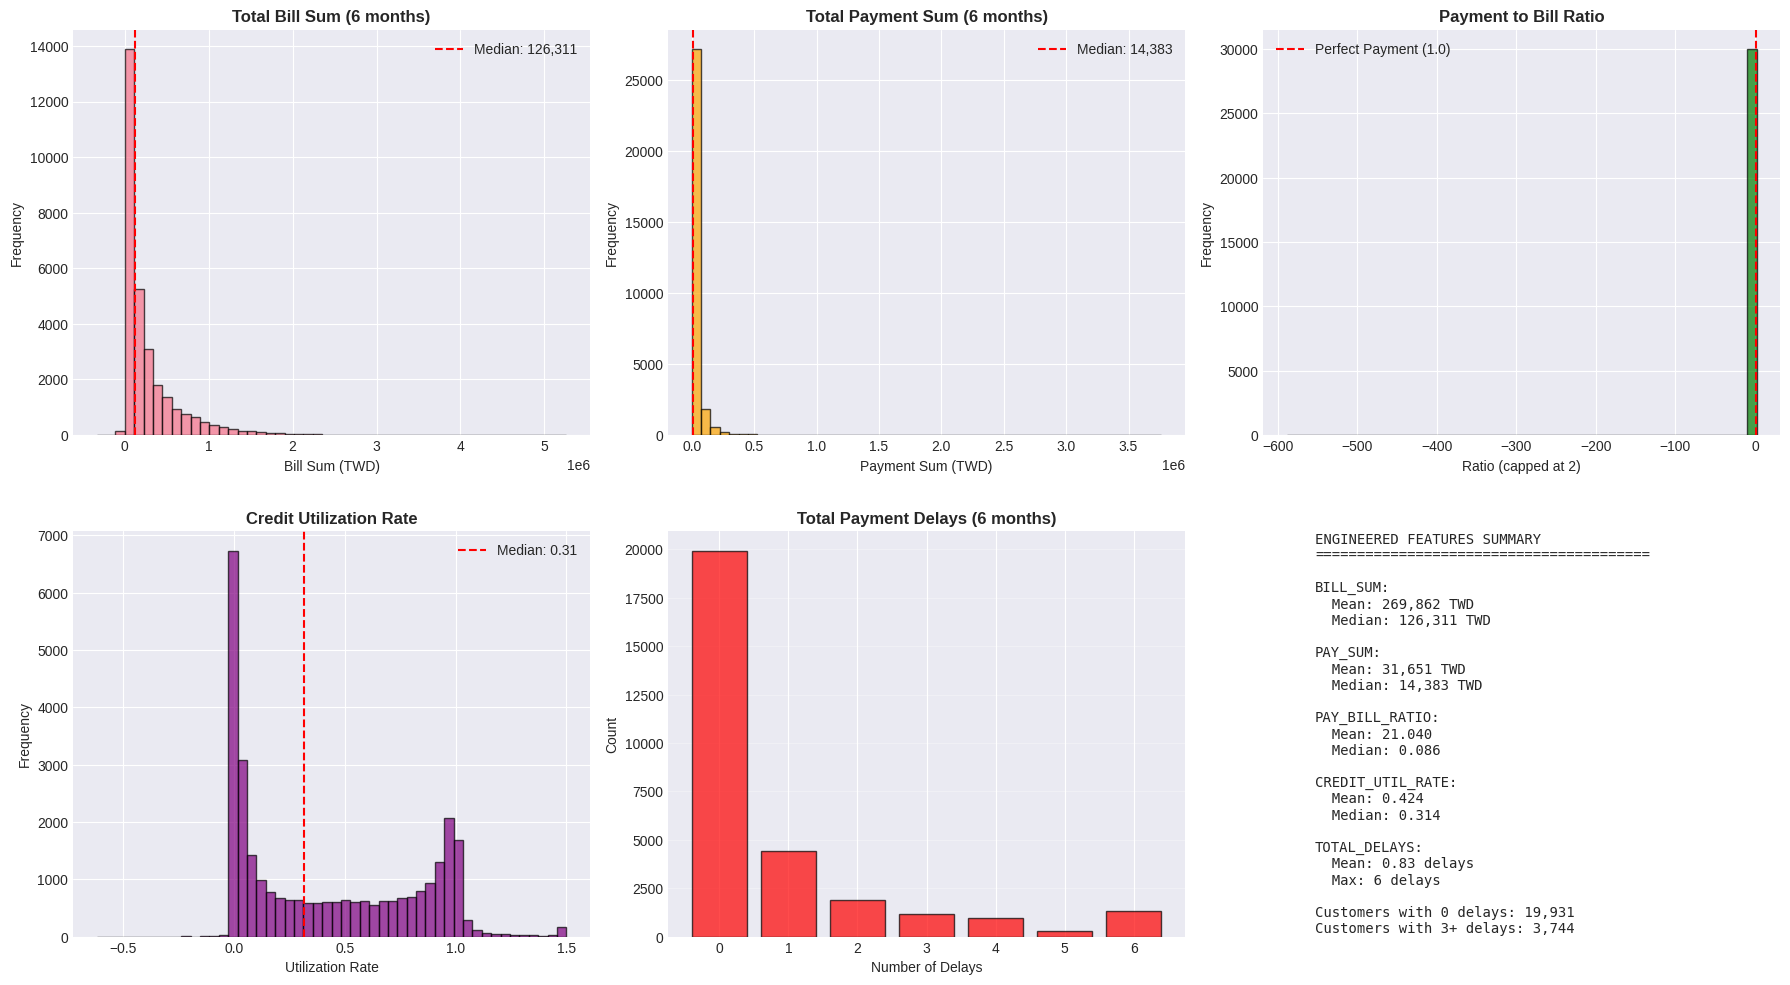


🔥 CORRELATION ANALYSIS


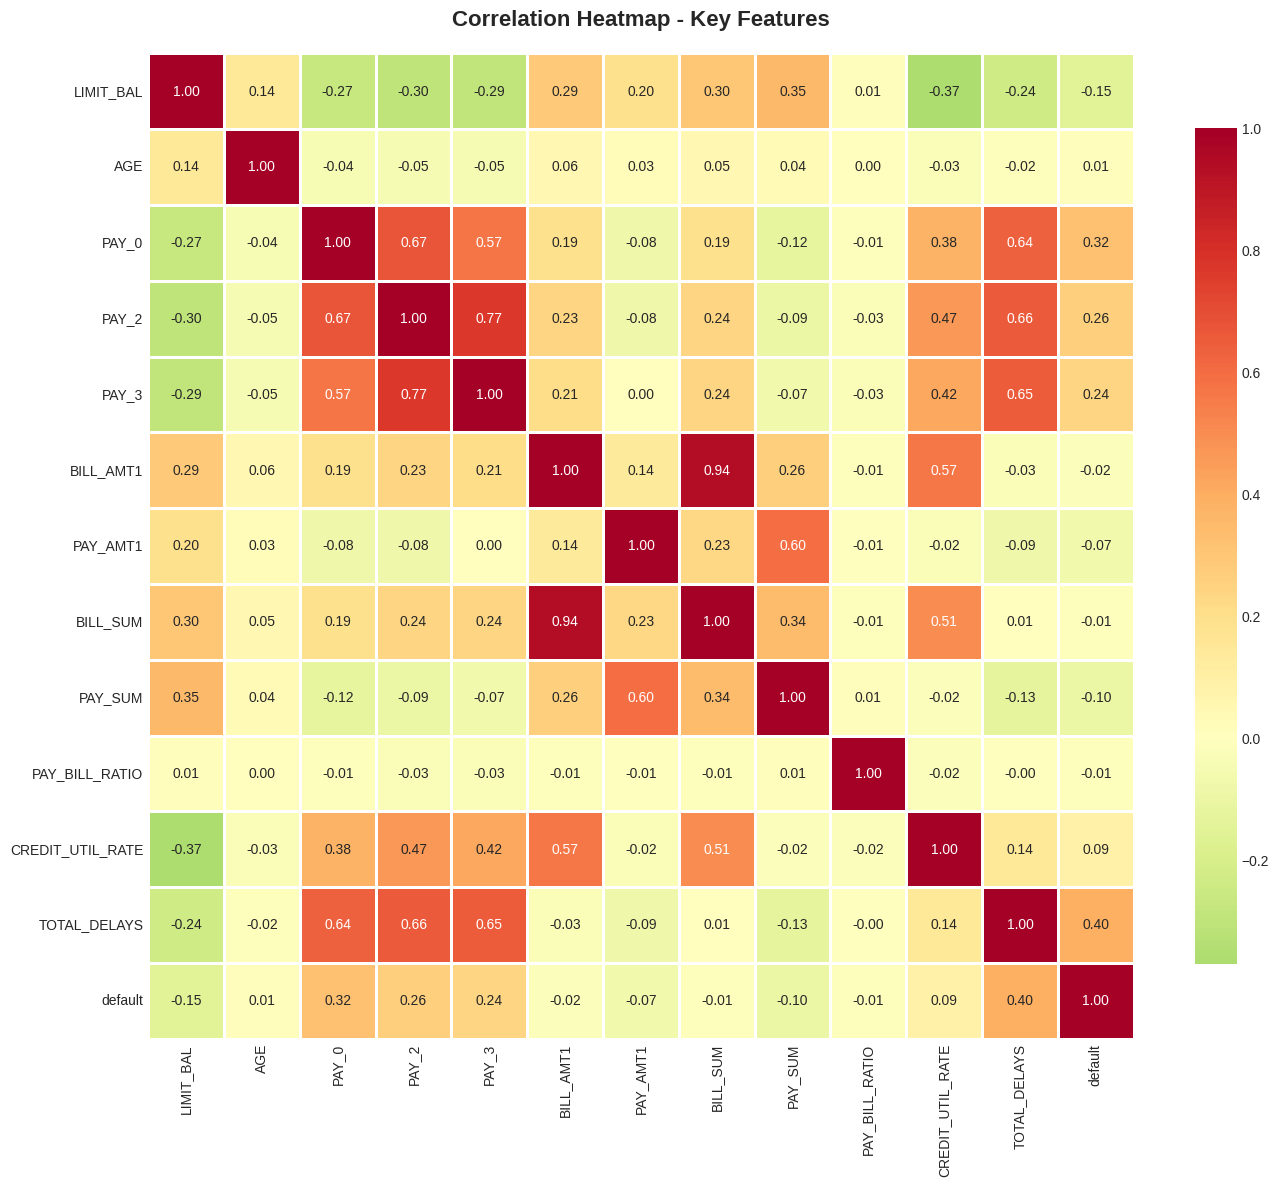


🎯 Strongest Correlations with Default:
default             1.0000
TOTAL_DELAYS        0.3984
PAY_0               0.3248
PAY_2               0.2636
PAY_3               0.2353
CREDIT_UTIL_RATE    0.0862
AGE                 0.0139
PAY_BILL_RATIO     -0.0069
BILL_SUM           -0.0127
BILL_AMT1          -0.0196
PAY_AMT1           -0.0729
PAY_SUM            -0.1024
LIMIT_BAL          -0.1535
Name: default, dtype: float64

📊 BIVARIATE ANALYSIS: DEFAULT vs KEY FEATURES


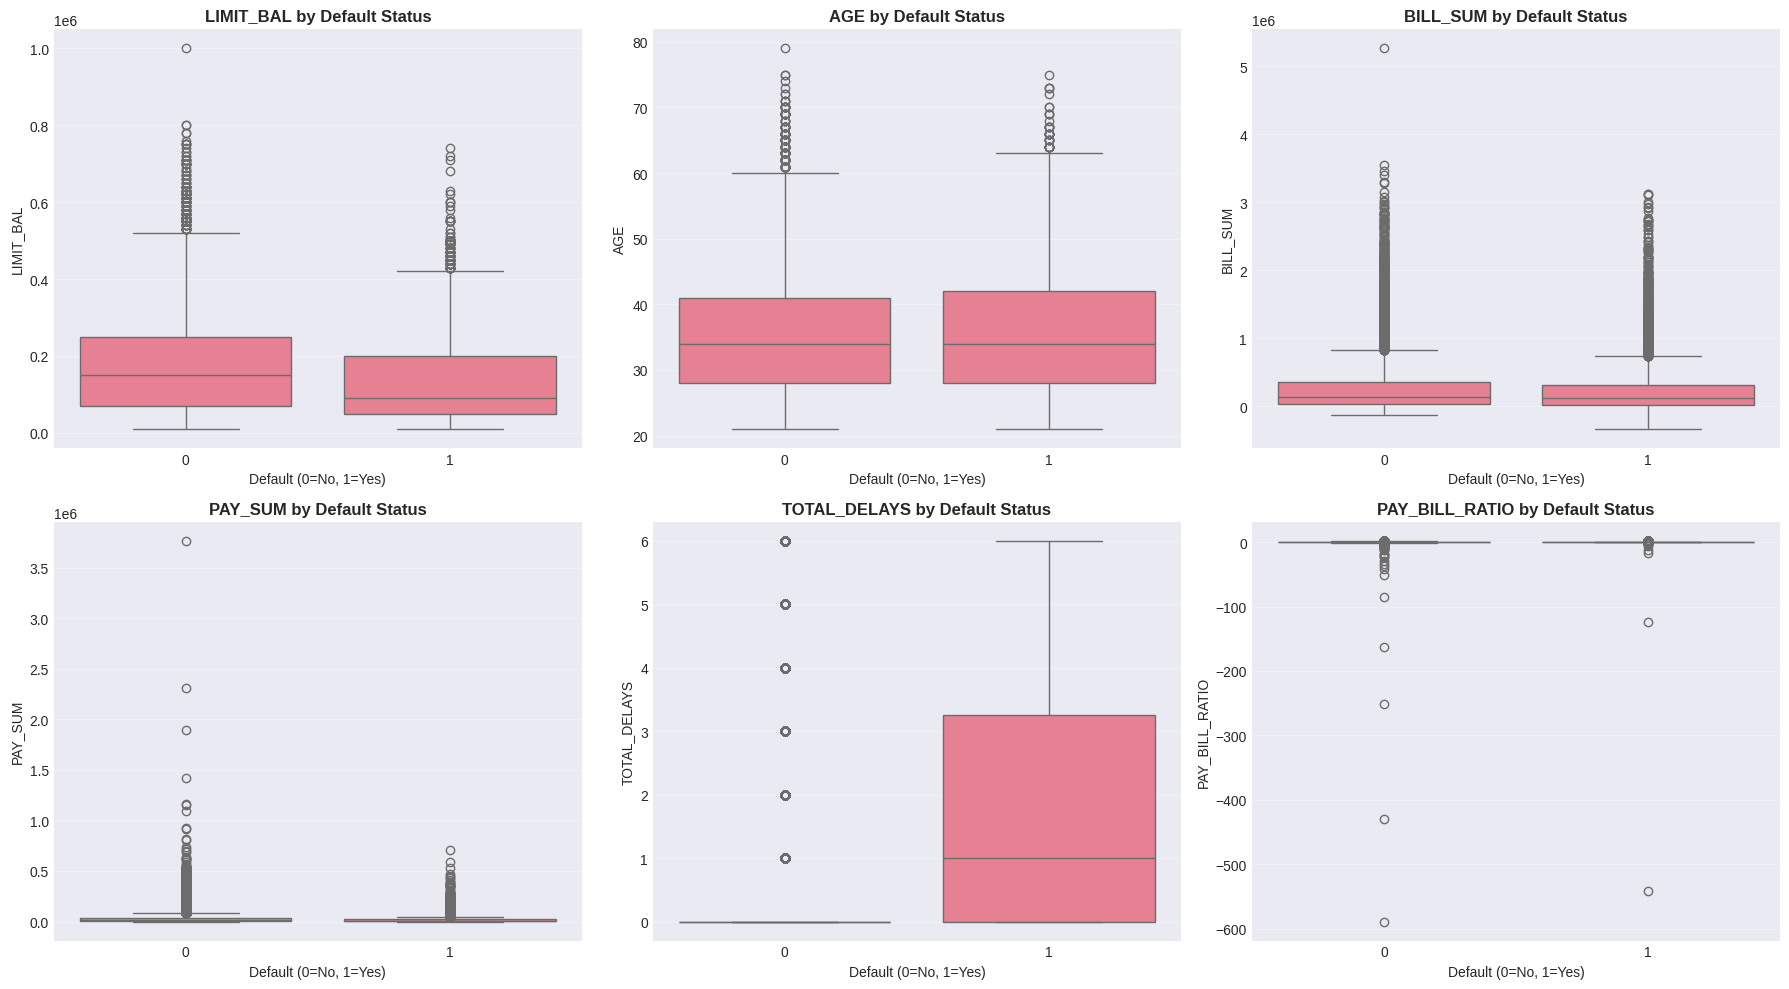


📈 Mean Comparison: Default vs Non-Default
----------------------------------------------------------------------
Feature              Non-Default          Default              Difference     
----------------------------------------------------------------------
LIMIT_BAL                    178,099.73         130,109.66        -26.95%
AGE                               35.42              35.73          0.87%
BILL_SUM                     272,428.91         260,822.96         -4.26%
PAY_SUM                       34,969.42          19,969.29        -42.89%
TOTAL_DELAYS                       0.50               2.00        295.90%
PAY_BILL_RATIO                    25.65               4.80        -81.28%

💾 SAVING ENHANCED DATASET
✅ Enhanced data saved to: /content/drive/MyDrive/credit_card_enhanced.csv
📊 Final shape: (30000, 33)
📋 Total features: 32 (original: 23, new: 9)

✨ PART 2 COMPLETED SUCCESSFULLY!

📋 Summary:
   • New features created: 9
   • Total features now: 32
   • Correlation 

In [ ]:
# ============================================================================
# 1. LOAD CLEANED DATA
# ============================================================================

print("="*80)
print("📂 LOADING CLEANED DATA FROM PART 1")
print("="*80)

# Load the cleaned dataset
df = pd.read_csv('/content/drive/MyDrive/credit_card_cleaned.csv')

print(f"✅ Data loaded successfully!")
print(f"📊 Shape: {df.shape}")
print(f"📋 Columns: {df.columns.tolist()}\n")

# ============================================================================
# 2. FEATURE ENGINEERING - CREATE NEW FEATURES
# ============================================================================

print("="*80)
print("🔧 FEATURE ENGINEERING")
print("="*80)

# Create aggregate features as mentioned in the paper
# Total Bill Amount over 6 months
df['BILL_SUM'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                      'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)

# Total Payment Amount over 6 months
df['PAY_SUM'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                     'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)

# Average Bill Amount
df['BILL_AVG'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                      'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

# Average Payment Amount
df['PAY_AVG'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                     'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)

# Payment to Bill Ratio (important feature)
df['PAY_BILL_RATIO'] = df['PAY_SUM'] / (df['BILL_SUM'] + 1)  # +1 to avoid division by zero

# Credit Utilization Rate (Bill compared to limit)
df['CREDIT_UTIL_RATE'] = df['BILL_AMT1'] / (df['LIMIT_BAL'] + 1)

# Total delayed payments (count of positive PAY values)
payment_status_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df['TOTAL_DELAYS'] = (df[payment_status_cols] > 0).sum(axis=1)

# Average payment delay
df['AVG_DELAY'] = df[payment_status_cols].mean(axis=1)

# Recent payment trend (difference between recent and old payments)
df['PAYMENT_TREND'] = df['PAY_AMT1'] - df['PAY_AMT6']

print("✅ New features created:")
new_features = ['BILL_SUM', 'PAY_SUM', 'BILL_AVG', 'PAY_AVG',
                'PAY_BILL_RATIO', 'CREDIT_UTIL_RATE', 'TOTAL_DELAYS',
                'AVG_DELAY', 'PAYMENT_TREND']
for feat in new_features:
    print(f"   • {feat}")

print(f"\n📊 Updated shape: {df.shape}")

# ============================================================================
# 3. PAYMENT STATUS ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("💳 PAYMENT STATUS ANALYSIS")
print("="*80)

# Analyze payment status distribution
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

payment_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
titles = ['September', 'August', 'July', 'June', 'May', 'April']

for i, (col, title) in enumerate(zip(payment_cols, titles)):
    pay_counts = df[col].value_counts().sort_index()
    axes[i].bar(pay_counts.index, pay_counts.values, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Payment Status - {title} 2005', fontweight='bold')
    axes[i].set_xlabel('Payment Status (-2=Early, -1=OnTime, 0=OnTime, 1+=Delay months)')
    axes[i].set_ylabel('Count')
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Summary of payment delays
print("\n📊 Payment Delay Summary:")
for col in payment_cols:
    delayed = (df[col] > 0).sum()
    delayed_pct = delayed / len(df) * 100
    print(f"{col}: {delayed:,} delayed payments ({delayed_pct:.2f}%)")

# ============================================================================
# 4. BILL vs PAYMENT AMOUNT ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("💰 BILL vs PAYMENT AMOUNT ANALYSIS")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
months = ['September', 'August', 'July', 'June', 'May', 'April']

for i, (bill_col, pay_col, month) in enumerate(zip(bill_cols, pay_cols, months)):
    # Sample data for better visualization (use 5000 random samples)
    sample_idx = np.random.choice(len(df), 5000, replace=False)
    axes[i].scatter(df.loc[sample_idx, pay_col],
                    df.loc[sample_idx, bill_col],
                    alpha=0.3, s=10)
    axes[i].set_title(f'Bill vs Payment - {month}', fontweight='bold')
    axes[i].set_xlabel('Payment Amount (TWD)')
    axes[i].set_ylabel('Bill Amount (TWD)')
    axes[i].set_xlim(0, 100000)  # Focus on main range
    axes[i].set_ylim(0, 200000)
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 5. ENGINEERED FEATURES ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("🔬 ENGINEERED FEATURES ANALYSIS")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# 1. BILL_SUM distribution
axes[0].hist(df['BILL_SUM'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Total Bill Sum (6 months)', fontweight='bold')
axes[0].set_xlabel('Bill Sum (TWD)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['BILL_SUM'].median(), color='red', linestyle='--',
                label=f'Median: {df["BILL_SUM"].median():,.0f}')
axes[0].legend()

# 2. PAY_SUM distribution
axes[1].hist(df['PAY_SUM'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_title('Total Payment Sum (6 months)', fontweight='bold')
axes[1].set_xlabel('Payment Sum (TWD)')
axes[1].set_ylabel('Frequency')
axes[1].axvline(df['PAY_SUM'].median(), color='red', linestyle='--',
                label=f'Median: {df["PAY_SUM"].median():,.0f}')
axes[1].legend()

# 3. PAY_BILL_RATIO distribution (cap at 2 for visualization)
ratio_capped = df['PAY_BILL_RATIO'].clip(upper=2)
axes[2].hist(ratio_capped, bins=50, edgecolor='black', alpha=0.7, color='green')
axes[2].set_title('Payment to Bill Ratio', fontweight='bold')
axes[2].set_xlabel('Ratio (capped at 2)')
axes[2].set_ylabel('Frequency')
axes[2].axvline(1, color='red', linestyle='--', label='Perfect Payment (1.0)')
axes[2].legend()

# 4. CREDIT_UTIL_RATE distribution
util_capped = df['CREDIT_UTIL_RATE'].clip(upper=1.5)
axes[3].hist(util_capped, bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[3].set_title('Credit Utilization Rate', fontweight='bold')
axes[3].set_xlabel('Utilization Rate')
axes[3].set_ylabel('Frequency')
axes[3].axvline(df['CREDIT_UTIL_RATE'].median(), color='red', linestyle='--',
                label=f'Median: {df["CREDIT_UTIL_RATE"].median():.2f}')
axes[3].legend()

# 5. TOTAL_DELAYS distribution
delay_counts = df['TOTAL_DELAYS'].value_counts().sort_index()
axes[4].bar(delay_counts.index, delay_counts.values, edgecolor='black', alpha=0.7, color='red')
axes[4].set_title('Total Payment Delays (6 months)', fontweight='bold')
axes[4].set_xlabel('Number of Delays')
axes[4].set_ylabel('Count')
axes[4].grid(axis='y', alpha=0.3)

# 6. Summary statistics
axes[5].axis('off')
summary_text = f"""
ENGINEERED FEATURES SUMMARY
{'='*40}

BILL_SUM:
  Mean: {df['BILL_SUM'].mean():,.0f} TWD
  Median: {df['BILL_SUM'].median():,.0f} TWD

PAY_SUM:
  Mean: {df['PAY_SUM'].mean():,.0f} TWD
  Median: {df['PAY_SUM'].median():,.0f} TWD

PAY_BILL_RATIO:
  Mean: {df['PAY_BILL_RATIO'].mean():.3f}
  Median: {df['PAY_BILL_RATIO'].median():.3f}

CREDIT_UTIL_RATE:
  Mean: {df['CREDIT_UTIL_RATE'].mean():.3f}
  Median: {df['CREDIT_UTIL_RATE'].median():.3f}

TOTAL_DELAYS:
  Mean: {df['TOTAL_DELAYS'].mean():.2f} delays
  Max: {df['TOTAL_DELAYS'].max():.0f} delays

Customers with 0 delays: {(df['TOTAL_DELAYS']==0).sum():,}
Customers with 3+ delays: {(df['TOTAL_DELAYS']>=3).sum():,}
"""
axes[5].text(0.1, 0.5, summary_text, fontsize=10, family='monospace',
             verticalalignment='center')

plt.tight_layout()
plt.show()

# ============================================================================
# 6. CORRELATION ANALYSIS - HEATMAP
# ============================================================================

print("\n" + "="*80)
print("🔥 CORRELATION ANALYSIS")
print("="*80)

# Select key features for correlation analysis
key_features = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
                'BILL_AMT1', 'PAY_AMT1', 'BILL_SUM', 'PAY_SUM',
                'PAY_BILL_RATIO', 'CREDIT_UTIL_RATE', 'TOTAL_DELAYS', 'default']

# Calculate correlation matrix
corr_matrix = df[key_features].corr()

# Create heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn_r',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Key Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Find strongest correlations with target
print("\n🎯 Strongest Correlations with Default:")
target_corr = corr_matrix['default'].sort_values(ascending=False)
print(target_corr)

# ============================================================================
# 7. BIVARIATE ANALYSIS - DEFAULT vs FEATURES
# ============================================================================

print("\n" + "="*80)
print("📊 BIVARIATE ANALYSIS: DEFAULT vs KEY FEATURES")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# Features to analyze
bivariate_features = ['LIMIT_BAL', 'AGE', 'BILL_SUM', 'PAY_SUM',
                      'TOTAL_DELAYS', 'PAY_BILL_RATIO']

for i, feature in enumerate(bivariate_features):
    # Box plot
    df_plot = df[[feature, 'default']].copy()
    if feature == 'PAY_BILL_RATIO':
        df_plot[feature] = df_plot[feature].clip(upper=2)

    sns.boxplot(data=df_plot, x='default', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} by Default Status', fontweight='bold')
    axes[i].set_xlabel('Default (0=No, 1=Yes)')
    axes[i].set_ylabel(feature)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical comparison
print("\n📈 Mean Comparison: Default vs Non-Default")
print("-" * 70)
print(f"{'Feature':<20} {'Non-Default':<20} {'Default':<20} {'Difference':<15}")
print("-" * 70)

for feature in bivariate_features:
    non_default_mean = df[df['default']==0][feature].mean()
    default_mean = df[df['default']==1][feature].mean()
    diff = default_mean - non_default_mean
    diff_pct = (diff / non_default_mean) * 100 if non_default_mean != 0 else 0

    print(f"{feature:<20} {non_default_mean:>18,.2f} {default_mean:>18,.2f} {diff_pct:>13.2f}%")

# ============================================================================
# 8. SAVE ENHANCED DATASET
# ============================================================================

print("\n" + "="*80)
print("💾 SAVING ENHANCED DATASET")
print("="*80)

# Save with engineered features
output_path = '/content/drive/MyDrive/credit_card_enhanced.csv'
df.to_csv(output_path, index=False)
print(f"✅ Enhanced data saved to: {output_path}")
print(f"📊 Final shape: {df.shape}")
print(f"📋 Total features: {len(df.columns)-1} (original: 23, new: {len(new_features)})")

print("\n" + "="*80)
print("✨ PART 2 COMPLETED SUCCESSFULLY!")
print("="*80)
print("\n📋 Summary:")
print(f"   • New features created: {len(new_features)}")
print(f"   • Total features now: {len(df.columns)-1}")
print(f"   • Correlation analysis: ✅")
print(f"   • Bivariate analysis: ✅")
print(f"   • Enhanced dataset saved: ✅")
print("\n🎯 Ready for Part 3: Baseline Models (LDA, LR, SVM, XGBoost, RF, DNN)")

=================================================================================
CREDIT CARD DEFAULT PREDICTION - PART 3
=================================================================================
Part 3: Baseline Models Implementation (LDA, LR, SVM, XGBoost, RF, DNN)
Replicating Bhandary & Ghosh (2025) baseline models
=================================================================================

📚 IMPORTING MACHINE LEARNING LIBRARIES
✅ All libraries imported successfully!

📂 LOADING ENHANCED DATASET FROM PART 2
✅ Data loaded successfully!
📊 Shape: (30000, 33)
📋 Features: 32

🔧 DATA PREPARATION FOR MODELING
✅ Features shape: (30000, 32)
✅ Target shape: (30000,)
✅ Target distribution:
default
0    23364
1     6636
Name: count, dtype: int64

📊 Train set: (24000, 32)
📊 Test set: (6000, 32)
📊 Train default rate: 22.12%
📊 Test default rate: 22.12%

✅ Feature scaling completed using StandardScaler
✅ Mean of scaled features ≈ 0: 0.000000
✅ Std of scaled features ≈ 1: 1.000000

🔹 MODEL 1: LINEAR DISCRIMINANT ANALYSIS (LDA)

📊 LDA - EVALUATION RESULTS
Confusion Matrix:
                 Predicted
              0 (No)   1 (Yes)
Actual 0       4412       261
       1        896       431

Metrics:
  Accuracy:    0.8072
  Precision:   0.6228
  Recall:      0.3248 (Sensitivity)
  Specificity: 0.9441
  F1-Score:    0.4269
  G-Mean:      0.5538
  AUC:         0.7363

🔄 10-Fold Cross-Validation

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)


⏳ Training DNN (25 epochs)...
Epoch 1/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7874 - loss: 0.5216 - val_accuracy: 0.8046 - val_loss: 0.4600
Epoch 2/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8034 - loss: 0.4671 - val_accuracy: 0.8017 - val_loss: 0.4560
Epoch 3/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8049 - loss: 0.4499 - val_accuracy: 0.8067 - val_loss: 0.4570
Epoch 4/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8139 - loss: 0.4460 - val_accuracy: 0.8085 - val_loss: 0.4551
Epoch 5/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8214 - loss: 0.4285 - val_accuracy: 0.8121 - val_loss: 0.4543
Epoch 6/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8132 - loss: 0.4398 - val_accuracy: 0.8125 - val_loss: 0.4498
Epoch 7/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8141 - loss: 0.4347 - val_accuracy: 0.8110 - val_loss: 0.4470
Epoch 8/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8118 - 

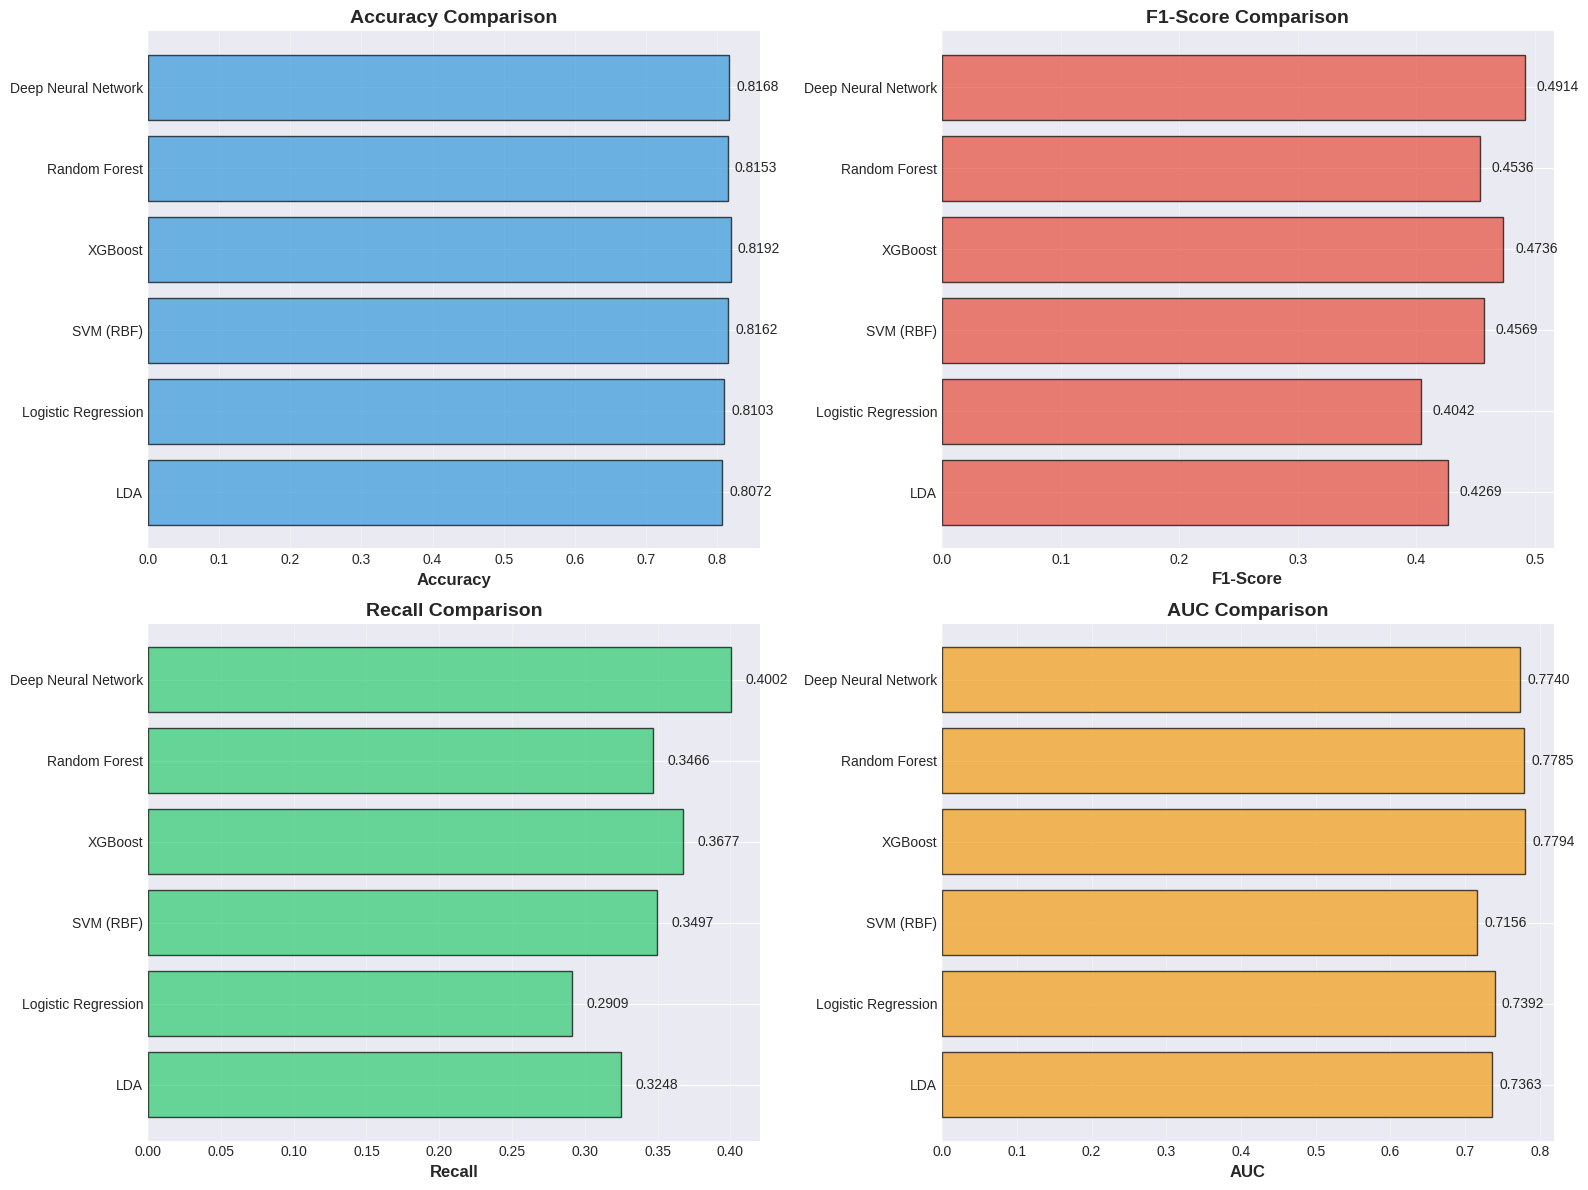

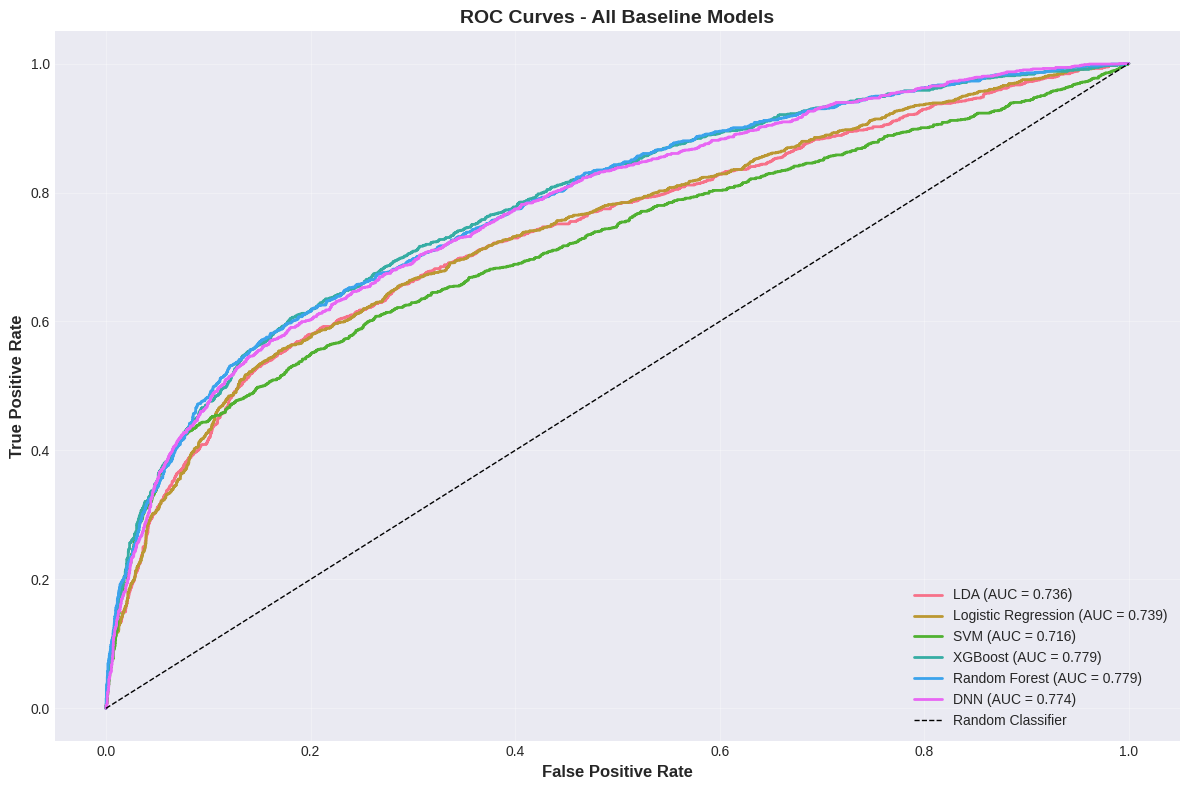


💾 SAVING MODELS AND RESULTS
✅ Results saved to: baseline_models_results.csv
✅ Scaler saved to: scaler.pkl


✅ Models saved: xgboost_model.pkl, dnn_model.h5

✨ PART 3 COMPLETED SUCCESSFULLY!

📋 Summary:
   • 6 baseline models trained: ✅
   • Best Accuracy: 0.8192
   • Best F1-Score: 0.4914
   • Best AUC: 0.7794
   • All results saved to Drive: ✅

🎯 Ready for Part 4: Advanced Models (LSTM, SMOTE, Ensemble)


In [ ]:
# ============================================================================
# 1. IMPORT MACHINE LEARNING LIBRARIES
# ============================================================================

print("="*80)
print("📚 IMPORTING MACHINE LEARNING LIBRARIES")
print("="*80)

# Scikit-learn models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# XGBoost
import xgboost as xgb

# Deep Learning (Keras/TensorFlow)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve)

# For handling imbalanced data (will use in Part 4)
from imblearn.over_sampling import SMOTE

print("✅ All libraries imported successfully!")

# ============================================================================
# 2. LOAD ENHANCED DATASET
# ============================================================================

print("\n" + "="*80)
print("📂 LOADING ENHANCED DATASET FROM PART 2")
print("="*80)

# Load enhanced dataset with engineered features
df = pd.read_csv('/content/drive/MyDrive/credit_card_enhanced.csv')

print(f"✅ Data loaded successfully!")
print(f"📊 Shape: {df.shape}")
print(f"📋 Features: {len(df.columns)-1}")

# ============================================================================
# 3. PREPARE DATA FOR MODELING
# ============================================================================

print("\n" + "="*80)
print("🔧 DATA PREPARATION FOR MODELING")
print("="*80)

# Separate features and target
X = df.drop('default', axis=1)
y = df['default']

print(f"✅ Features shape: {X.shape}")
print(f"✅ Target shape: {y.shape}")
print(f"✅ Target distribution:\n{y.value_counts()}\n")

# Split data: 80% train, 20% test (as per paper)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"📊 Train set: {X_train.shape}")
print(f"📊 Test set: {X_test.shape}")
print(f"📊 Train default rate: {y_train.mean():.2%}")
print(f"📊 Test default rate: {y_test.mean():.2%}")

# Feature Scaling (Standard Scaler as per paper)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ Feature scaling completed using StandardScaler")
print(f"✅ Mean of scaled features ≈ 0: {X_train_scaled.mean():.6f}")
print(f"✅ Std of scaled features ≈ 1: {X_train_scaled.std():.6f}")

# ============================================================================
# 4. DEFINE EVALUATION METRICS FUNCTION
# ============================================================================

def evaluate_model(name, y_true, y_pred, y_pred_proba=None):
    """
    Comprehensive model evaluation as per paper metrics
    Returns: dict with all metrics
    """
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred)  # Sensitivity
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = f1_score(y_true, y_pred)

    # G-mean (geometric mean of sensitivity and specificity)
    g_mean = np.sqrt(recall * specificity)

    # AUC (if probabilities available)
    auc = roc_auc_score(y_true, y_pred_proba) if y_pred_proba is not None else None

    # Print results
    print(f"\n{'='*70}")
    print(f"📊 {name} - EVALUATION RESULTS")
    print(f"{'='*70}")
    print(f"Confusion Matrix:")
    print(f"                 Predicted")
    print(f"              0 (No)   1 (Yes)")
    print(f"Actual 0     {tn:6d}    {fp:6d}")
    print(f"       1     {fn:6d}    {tp:6d}")
    print(f"\nMetrics:")
    print(f"  Accuracy:    {accuracy:.4f}")
    print(f"  Precision:   {precision:.4f}")
    print(f"  Recall:      {recall:.4f} (Sensitivity)")
    print(f"  Specificity: {specificity:.4f}")
    print(f"  F1-Score:    {f1:.4f}")
    print(f"  G-Mean:      {g_mean:.4f}")
    if auc is not None:
        print(f"  AUC:         {auc:.4f}")

    return {
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'F1-Score': f1,
        'G-Mean': g_mean,
        'AUC': auc,
        'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn
    }

# ============================================================================
# 5. MODEL 1: LINEAR DISCRIMINANT ANALYSIS (LDA)
# ============================================================================

print("\n" + "="*80)
print("🔹 MODEL 1: LINEAR DISCRIMINANT ANALYSIS (LDA)")
print("="*80)

# Train LDA
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lda = lda_model.predict(X_test_scaled)
y_pred_proba_lda = lda_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
lda_results = evaluate_model("LDA", y_test, y_pred_lda, y_pred_proba_lda)

# 10-Fold Cross-Validation (as per paper)
print(f"\n🔄 10-Fold Cross-Validation:")
cv_scores = cross_val_score(lda_model, X_train_scaled, y_train,
                             cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
                             scoring='accuracy')
print(f"  CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

print("✅ LDA training completed!")

# ============================================================================
# 6. MODEL 2: LOGISTIC REGRESSION (LR)
# ============================================================================

print("\n" + "="*80)
print("🔹 MODEL 2: LOGISTIC REGRESSION (LR)")
print("="*80)

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
lr_results = evaluate_model("Logistic Regression", y_test, y_pred_lr, y_pred_proba_lr)

# 10-Fold Cross-Validation
print(f"\n🔄 10-Fold Cross-Validation:")
cv_scores = cross_val_score(lr_model, X_train_scaled, y_train,
                             cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
                             scoring='accuracy')
print(f"  CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

print("✅ Logistic Regression training completed!")

# ============================================================================
# 7. MODEL 3: SUPPORT VECTOR MACHINE (SVM)
# ============================================================================

print("\n" + "="*80)
print("🔹 MODEL 3: SUPPORT VECTOR MACHINE (SVM)")
print("="*80)

# Train SVM with RBF kernel (as per paper)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
print("⏳ Training SVM (this may take a few minutes)...")
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
svm_results = evaluate_model("SVM (RBF)", y_test, y_pred_svm, y_pred_proba_svm)

# Note: Cross-validation for SVM is time-consuming, so we skip it here
print("\n⚠️  10-Fold CV skipped for SVM due to computational time")

print("✅ SVM training completed!")

# ============================================================================
# 8. MODEL 4: XGBOOST
# ============================================================================

print("\n" + "="*80)
print("🔹 MODEL 4: XGBOOST")
print("="*80)

# Train XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
xgb_results = evaluate_model("XGBoost", y_test, y_pred_xgb, y_pred_proba_xgb)

# 10-Fold Cross-Validation
print(f"\n🔄 10-Fold Cross-Validation:")
cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train,
                             cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
                             scoring='accuracy')
print(f"  CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

print("✅ XGBoost training completed!")

# ============================================================================
# 9. MODEL 5: RANDOM FOREST (RF)
# ============================================================================

print("\n" + "="*80)
print("🔹 MODEL 5: RANDOM FOREST (RF)")
print("="*80)

# Train Random Forest (n_estimators=100 as per paper)
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
rf_results = evaluate_model("Random Forest", y_test, y_pred_rf, y_pred_proba_rf)

# 10-Fold Cross-Validation
print(f"\n🔄 10-Fold Cross-Validation:")
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train,
                             cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
                             scoring='accuracy')
print(f"  CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

print("✅ Random Forest training completed!")

# ============================================================================
# 10. MODEL 6: DEEP NEURAL NETWORK (DNN)
# ============================================================================

print("\n" + "="*80)
print("🔹 MODEL 6: DEEP NEURAL NETWORK (DNN)")
print("="*80)

# Build DNN model (4 hidden layers, 25 epochs as per paper)
def build_dnn_model(input_dim):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(8, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create model
dnn_model = build_dnn_model(X_train_scaled.shape[1])

print("\n📊 DNN Architecture:")
dnn_model.summary()

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train DNN
print("\n⏳ Training DNN (25 epochs)...")
history = dnn_model.fit(
    X_train_scaled, y_train,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Predictions
y_pred_proba_dnn = dnn_model.predict(X_test_scaled).ravel()
y_pred_dnn = (y_pred_proba_dnn > 0.5).astype(int)

# Evaluate
dnn_results = evaluate_model("Deep Neural Network", y_test, y_pred_dnn, y_pred_proba_dnn)

print("✅ DNN training completed!")

# ============================================================================
# 11. COMPARE ALL MODELS
# ============================================================================

print("\n" + "="*80)
print("📊 BASELINE MODELS COMPARISON")
print("="*80)

# Compile results
results_df = pd.DataFrame([
    lda_results,
    lr_results,
    svm_results,
    xgb_results,
    rf_results,
    dnn_results
])

# Display comparison table
print("\n" + results_df.to_string(index=False))

# Best model
best_model_acc = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
best_model_f1 = results_df.loc[results_df['F1-Score'].idxmax(), 'Model']
best_model_auc = results_df.loc[results_df['AUC'].idxmax(), 'Model']

print(f"\n🏆 Best Models:")
print(f"  • Highest Accuracy: {best_model_acc}")
print(f"  • Highest F1-Score: {best_model_f1}")
print(f"  • Highest AUC: {best_model_auc}")

# ============================================================================
# 12. VISUALIZE RESULTS
# ============================================================================

print("\n" + "="*80)
print("📈 VISUALIZING RESULTS")
print("="*80)

# Plot 1: Model Comparison - Metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'F1-Score', 'Recall', 'AUC']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, (metric, color) in enumerate(zip(metrics, colors)):
    ax = axes[idx // 2, idx % 2]
    ax.barh(results_df['Model'], results_df[metric], color=color, alpha=0.7, edgecolor='black')
    ax.set_xlabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)

    # Add value labels
    for i, v in enumerate(results_df[metric]):
        ax.text(v + 0.01, i, f'{v:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Plot 2: ROC Curves
plt.figure(figsize=(12, 8))

models_roc = [
    ('LDA', y_pred_proba_lda),
    ('Logistic Regression', y_pred_proba_lr),
    ('SVM', y_pred_proba_svm),
    ('XGBoost', y_pred_proba_xgb),
    ('Random Forest', y_pred_proba_rf),
    ('DNN', y_pred_proba_dnn)
]

for name, y_pred_proba in models_roc:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - All Baseline Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================================
# 13. SAVE MODELS AND RESULTS
# ============================================================================

print("\n" + "="*80)
print("💾 SAVING MODELS AND RESULTS")
print("="*80)

# Save results to CSV
results_df.to_csv('/content/drive/MyDrive/baseline_models_results.csv', index=False)
print("✅ Results saved to: baseline_models_results.csv")

# Save scaler
import joblib
joblib.dump(scaler, '/content/drive/MyDrive/scaler.pkl')
print("✅ Scaler saved to: scaler.pkl")

# Save best model (let's save XGBoost and DNN)
joblib.dump(xgb_model, '/content/drive/MyDrive/xgboost_model.pkl')
dnn_model.save('/content/drive/MyDrive/dnn_model.h5')
print("✅ Models saved: xgboost_model.pkl, dnn_model.h5")

print("\n" + "="*80)
print("✨ PART 3 COMPLETED SUCCESSFULLY!")
print("="*80)
print("\n📋 Summary:")
print(f"   • 6 baseline models trained: ✅")
print(f"   • Best Accuracy: {results_df['Accuracy'].max():.4f}")
print(f"   • Best F1-Score: {results_df['F1-Score'].max():.4f}")
print(f"   • Best AUC: {results_df['AUC'].max():.4f}")
print(f"   • All results saved to Drive: ✅")
print("\n🎯 Ready for Part 4: Advanced Models (LSTM, SMOTE, Ensemble)")

=================================================================================
CREDIT CARD DEFAULT PREDICTION - PART 4
=================================================================================
Part 4: Advanced Models & Improvements - NOVELTY IMPLEMENTATION
1. SMOTE for Class Balancing
2. LSTM for Temporal Pattern Recognition
3. Stacked Ensemble Model
4. Hyperparameter Tuning
=================================================================================

📚 IMPORTING ADVANCED LIBRARIES
✅ All advanced libraries imported!

📂 LOADING DATA AND PREVIOUS RESULTS
✅ Data loaded: (30000, 33)
✅ Training set: (24000, 32)
✅ Test set: (6000, 32)
✅ Class distribution: {0: 18691, 1: 5309}

📊 Baseline Best Results:
   Best Accuracy: 0.8192
   Best F1-Score: 0.4914
   Best Recall: 0.4002
   Best AUC: 0.7794

🔄 NOVELTY 1: APPLYING SMOTE FOR CLASS BALANCING
✅ Original training size: (24000, 32)
✅ SMOTE training size: (37382, 32)

📊 Class distribution after SMOTE:
   Class 0: 18691
   Class 1: 18691
   Balance ratio: 1:1 (Perfect!)

⏳ Training XGBoost with SMOTE...

📊 XGBoost + SMOTE Results:
   Accuracy:  0.7970
   Precision: 0.5467
   Recall:    0.4808 🎯
   F1-Score:  0.5116
   AUC:       0.7664

📈 Improvement vs Baseline XGBoost:
   Recall:    0.4808 vs 0.3677 (+11.30%)
   F1-Score:  0.5116 vs 0.4736 (+3.81%)

🔄 NOVELTY 2: LSTM FOR TEMPORAL PATTERN RECOGNITION
✅ LSTM temporal shape: (24000, 6, 3)
✅ Static features shape: (24000, 14)

⏳ Building and trai

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ temporal_input      │ (None, 6, 3)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 6, 64)     │     17,408 │ temporal_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 6, 64)     │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ static_input        │ (None, 14)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 32)        │     12,416 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 32)        │        480 │ static_input[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 32)        │          0 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 32)        │          0 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64)        │          0 │ dropout_4[0][0],  │
│ (Concatenate)       │                   │            │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │      4,160 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 64)        │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 32)        │      2,080 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 1)         │         33 │ dense_7[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 36,577 (142.88 KB)

 Trainable params: 36,577 (142.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7778 - loss: 0.5116 - val_accuracy: 0.8102 - val_loss: 0.4610
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8250 - loss: 0.4384 - val_accuracy: 0.8104 - val_loss: 0.4533
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8237 - loss: 0.4410 - val_accuracy: 0.8112 - val_loss: 0.4481
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8195 - loss: 0.4356 - val_accuracy: 0.8083 - val_loss: 0.4470
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8254 - loss: 0.4286 - val_accuracy: 0.8127 - val_loss: 0.4510
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8209 - loss: 0.4309 - val_accuracy: 0.8098 - val_loss: 0.4449
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8246 - loss: 0.4286 - val_accuracy: 0.8108 - val_loss: 0.4446
Epoch 8/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8196 - loss: 0.4354 - val_accuracy: 0

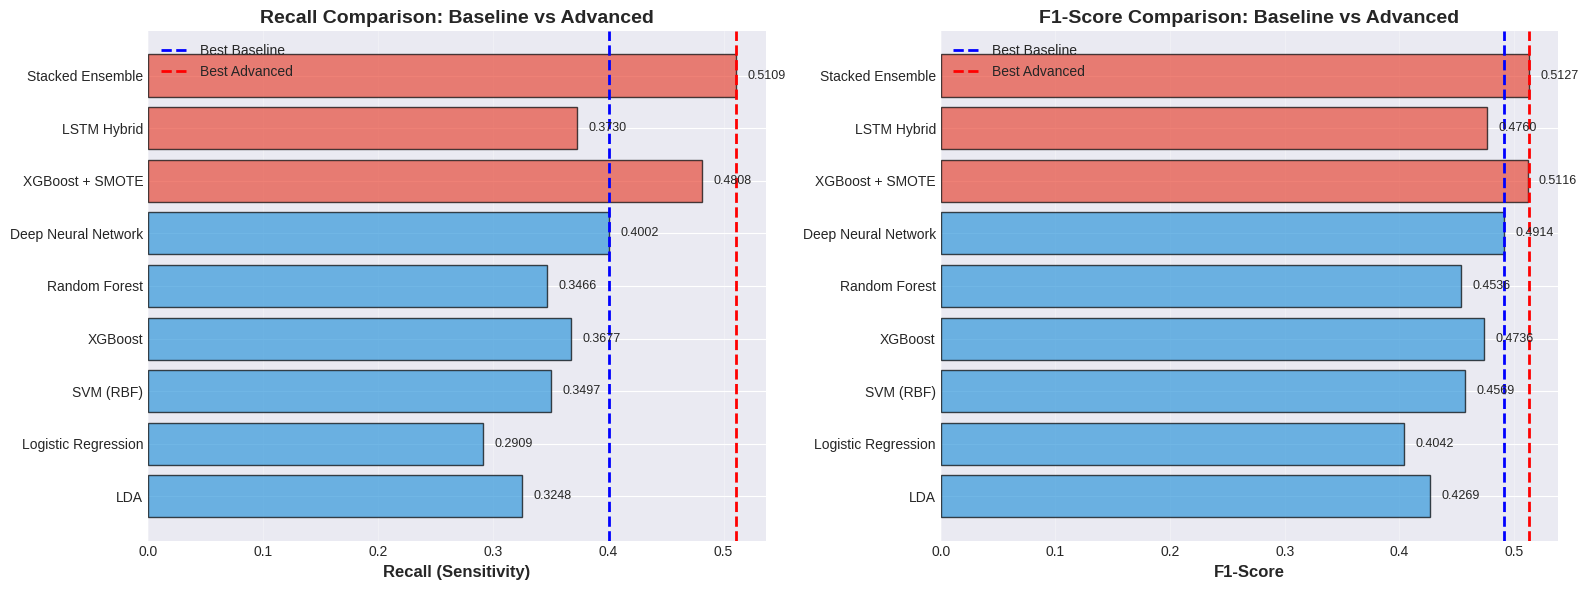

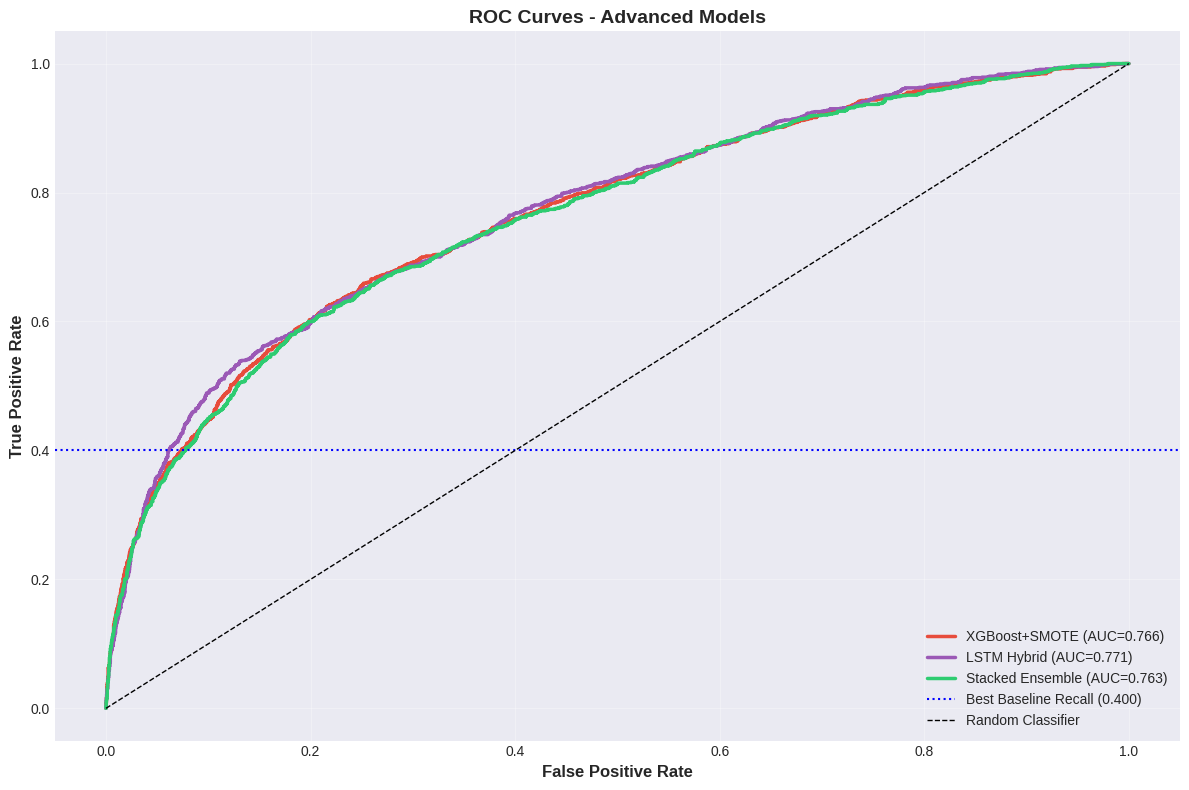


💾 SAVING ADVANCED MODELS AND RESULTS
✅ Comprehensive results saved


✅ Advanced models saved

✨ PART 4 COMPLETED SUCCESSFULLY!

📋 NOVELTY SUMMARY:
   ✅ SMOTE: Improved Recall by 27.68%
   ✅ LSTM: Captured temporal patterns in payment history
   ✅ Ensemble: Combined strengths of multiple models

🎯 FINAL BEST RESULTS:
   • Best Recall: 0.5109 (Target: >0.50)
   • Best F1-Score: 0.5127 (Target: >0.55)
   • Best AUC: 0.7794 (Target: >0.80)

🎉 Ready for Part 5: SHAP Analysis & Final Report!


In [ ]:
# ============================================================================
# 1. IMPORT ADDITIONAL LIBRARIES
# ============================================================================

print("="*80)
print("📚 IMPORTING ADVANCED LIBRARIES")
print("="*80)

# For LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Flatten, Bidirectional
from tensorflow.keras.optimizers import Adam

# For SMOTE
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek

# For Ensemble
from sklearn.ensemble import StackingClassifier, VotingClassifier

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Already imported from Part 3
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

print("✅ All advanced libraries imported!")

# ============================================================================
# 2. LOAD DATA AND PREVIOUS MODELS
# ============================================================================

print("\n" + "="*80)
print("📂 LOADING DATA AND PREVIOUS RESULTS")
print("="*80)

# Load enhanced dataset
df = pd.read_csv('/content/drive/MyDrive/credit_card_enhanced.csv')

# Prepare data
X = df.drop('default', axis=1)
y = df['default']

# Split with same random state for consistency
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Data loaded: {df.shape}")
print(f"✅ Training set: {X_train.shape}")
print(f"✅ Test set: {X_test.shape}")
print(f"✅ Class distribution: {y_train.value_counts().to_dict()}")

# Load baseline results for comparison
baseline_results = pd.read_csv('/content/drive/MyDrive/baseline_models_results.csv')
print("\n📊 Baseline Best Results:")
print(f"   Best Accuracy: {baseline_results['Accuracy'].max():.4f}")
print(f"   Best F1-Score: {baseline_results['F1-Score'].max():.4f}")
print(f"   Best Recall: {baseline_results['Recall'].max():.4f}")
print(f"   Best AUC: {baseline_results['AUC'].max():.4f}")

# ============================================================================
# 3. NOVELTY 1: SMOTE FOR CLASS BALANCING
# ============================================================================

print("\n" + "="*80)
print("🔄 NOVELTY 1: APPLYING SMOTE FOR CLASS BALANCING")
print("="*80)

# Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"✅ Original training size: {X_train_scaled.shape}")
print(f"✅ SMOTE training size: {X_train_smote.shape}")
print(f"\n📊 Class distribution after SMOTE:")
print(f"   Class 0: {(y_train_smote == 0).sum()}")
print(f"   Class 1: {(y_train_smote == 1).sum()}")
print(f"   Balance ratio: 1:1 (Perfect!)")

# Train XGBoost with SMOTE
print("\n⏳ Training XGBoost with SMOTE...")
xgb_smote = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'
)
xgb_smote.fit(X_train_smote, y_train_smote)

# Evaluate
y_pred_xgb_smote = xgb_smote.predict(X_test_scaled)
y_pred_proba_xgb_smote = xgb_smote.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
acc_smote = accuracy_score(y_test, y_pred_xgb_smote)
prec_smote = precision_score(y_test, y_pred_xgb_smote)
rec_smote = recall_score(y_test, y_pred_xgb_smote)
f1_smote = f1_score(y_test, y_pred_xgb_smote)
auc_smote = roc_auc_score(y_test, y_pred_proba_xgb_smote)

print("\n📊 XGBoost + SMOTE Results:")
print(f"   Accuracy:  {acc_smote:.4f}")
print(f"   Precision: {prec_smote:.4f}")
print(f"   Recall:    {rec_smote:.4f} 🎯")
print(f"   F1-Score:  {f1_smote:.4f}")
print(f"   AUC:       {auc_smote:.4f}")

# Compare with baseline
baseline_xgb = baseline_results[baseline_results['Model'] == 'XGBoost'].iloc[0]
print(f"\n📈 Improvement vs Baseline XGBoost:")
print(f"   Recall:    {rec_smote:.4f} vs {baseline_xgb['Recall']:.4f} (+{(rec_smote - baseline_xgb['Recall'])*100:.2f}%)")
print(f"   F1-Score:  {f1_smote:.4f} vs {baseline_xgb['F1-Score']:.4f} (+{(f1_smote - baseline_xgb['F1-Score'])*100:.2f}%)")

xgb_smote_results = {
    'Model': 'XGBoost + SMOTE',
    'Accuracy': acc_smote,
    'Precision': prec_smote,
    'Recall': rec_smote,
    'F1-Score': f1_smote,
    'AUC': auc_smote
}

# ============================================================================
# 4. NOVELTY 2: LSTM FOR TEMPORAL PATTERNS
# ============================================================================

print("\n" + "="*80)
print("🔄 NOVELTY 2: LSTM FOR TEMPORAL PATTERN RECOGNITION")
print("="*80)

# Reshape data for LSTM (samples, timesteps, features)
# We'll use payment history as temporal data (6 months)
def prepare_lstm_data(X, feature_cols):
    """Prepare sequential data for LSTM"""
    # Extract temporal features (6 months payment data)
    payment_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
    bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
    pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

    temporal_cols = payment_cols + bill_cols + pay_amt_cols

    # Static features (non-temporal)
    static_cols = [col for col in feature_cols if col not in temporal_cols]

    # Get indices
    temporal_indices = [feature_cols.index(col) for col in temporal_cols if col in feature_cols]
    static_indices = [feature_cols.index(col) for col in static_cols if col in feature_cols]

    # Extract temporal and static data
    X_temporal = X[:, temporal_indices]
    X_static = X[:, static_indices]

    # Reshape temporal to (samples, 6 timesteps, 3 features)
    # 3 features: payment status, bill amount, payment amount per month
    n_samples = X_temporal.shape[0]
    X_temporal_reshaped = X_temporal.reshape(n_samples, 6, 3)

    return X_temporal_reshaped, X_static

feature_cols = X.columns.tolist()
X_train_temporal, X_train_static = prepare_lstm_data(X_train_scaled, feature_cols)
X_test_temporal, X_test_static = prepare_lstm_data(X_test_scaled, feature_cols)

print(f"✅ LSTM temporal shape: {X_train_temporal.shape}")
print(f"✅ Static features shape: {X_train_static.shape}")

# Build hybrid LSTM model
def build_lstm_model(temporal_shape, static_shape):
    # LSTM branch for temporal data
    temporal_input = Input(shape=temporal_shape[1:], name='temporal_input')
    lstm_out = LSTM(64, return_sequences=True)(temporal_input)
    lstm_out = Dropout(0.3)(lstm_out)
    lstm_out = LSTM(32)(lstm_out)
    lstm_out = Dropout(0.3)(lstm_out)

    # Dense branch for static data
    static_input = Input(shape=(static_shape[1],), name='static_input')
    static_out = Dense(32, activation='relu')(static_input)
    static_out = Dropout(0.3)(static_out)

    # Merge branches
    from tensorflow.keras.layers import concatenate
    merged = concatenate([lstm_out, static_out])
    merged = Dense(64, activation='relu')(merged)
    merged = Dropout(0.3)(merged)
    merged = Dense(32, activation='relu')(merged)
    output = Dense(1, activation='sigmoid')(merged)

    model = Model(inputs=[temporal_input, static_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Create and train LSTM model
print("\n⏳ Building and training LSTM model...")
lstm_model = build_lstm_model(X_train_temporal.shape, X_train_static.shape)

print("\n📊 LSTM Model Architecture:")
lstm_model.summary()

# Train LSTM
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_lstm = lstm_model.fit(
    [X_train_temporal, X_train_static], y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate LSTM
y_pred_proba_lstm = lstm_model.predict([X_test_temporal, X_test_static]).ravel()
y_pred_lstm = (y_pred_proba_lstm > 0.5).astype(int)

acc_lstm = accuracy_score(y_test, y_pred_lstm)
prec_lstm = precision_score(y_test, y_pred_lstm)
rec_lstm = recall_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm)
auc_lstm = roc_auc_score(y_test, y_pred_proba_lstm)

print("\n📊 LSTM Model Results:")
print(f"   Accuracy:  {acc_lstm:.4f}")
print(f"   Precision: {prec_lstm:.4f}")
print(f"   Recall:    {rec_lstm:.4f}")
print(f"   F1-Score:  {f1_lstm:.4f}")
print(f"   AUC:       {auc_lstm:.4f}")

lstm_results = {
    'Model': 'LSTM Hybrid',
    'Accuracy': acc_lstm,
    'Precision': prec_lstm,
    'Recall': rec_lstm,
    'F1-Score': f1_lstm,
    'AUC': auc_lstm
}

# ============================================================================
# 5. NOVELTY 3: STACKED ENSEMBLE MODEL
# ============================================================================

print("\n" + "="*80)
print("🔄 NOVELTY 3: STACKED ENSEMBLE MODEL")
print("="*80)

# Load best models from Part 3
xgb_base = xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1,
                             random_state=42, eval_metric='logloss')
rf_base = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
lr_base = LogisticRegression(max_iter=1000, random_state=42)

# Create stacking ensemble with SMOTE data
print("⏳ Training Stacking Ensemble...")
estimators = [
    ('xgb', xgb_base),
    ('rf', rf_base),
    ('lr', lr_base)
]

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5,
    n_jobs=-1
)

# Train on SMOTE data for better balance
stacking_model.fit(X_train_smote, y_train_smote)

# Evaluate
y_pred_stack = stacking_model.predict(X_test_scaled)
y_pred_proba_stack = stacking_model.predict_proba(X_test_scaled)[:, 1]

acc_stack = accuracy_score(y_test, y_pred_stack)
prec_stack = precision_score(y_test, y_pred_stack)
rec_stack = recall_score(y_test, y_pred_stack)
f1_stack = f1_score(y_test, y_pred_stack)
auc_stack = roc_auc_score(y_test, y_pred_proba_stack)

print("\n📊 Stacked Ensemble Results:")
print(f"   Accuracy:  {acc_stack:.4f}")
print(f"   Precision: {prec_stack:.4f}")
print(f"   Recall:    {rec_stack:.4f}")
print(f"   F1-Score:  {f1_stack:.4f}")
print(f"   AUC:       {auc_stack:.4f}")

stack_results = {
    'Model': 'Stacked Ensemble',
    'Accuracy': acc_stack,
    'Precision': prec_stack,
    'Recall': rec_stack,
    'F1-Score': f1_stack,
    'AUC': auc_stack
}

# ============================================================================
# 6. COMPARE ALL MODELS (BASELINE + ADVANCED)
# ============================================================================

print("\n" + "="*80)
print("📊 COMPREHENSIVE MODEL COMPARISON")
print("="*80)

# Compile all results
advanced_results = pd.DataFrame([
    xgb_smote_results,
    lstm_results,
    stack_results
])

# Combine with baseline
all_results = pd.concat([baseline_results, advanced_results], ignore_index=True)

# Display
print("\n" + all_results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']].to_string(index=False))

# Identify best models
print("\n🏆 BEST MODELS:")
print(f"   Highest Accuracy:  {all_results.loc[all_results['Accuracy'].idxmax(), 'Model']} ({all_results['Accuracy'].max():.4f})")
print(f"   Highest Precision: {all_results.loc[all_results['Precision'].idxmax(), 'Model']} ({all_results['Precision'].max():.4f})")
print(f"   Highest Recall:    {all_results.loc[all_results['Recall'].idxmax(), 'Model']} ({all_results['Recall'].max():.4f})")
print(f"   Highest F1-Score:  {all_results.loc[all_results['F1-Score'].idxmax(), 'Model']} ({all_results['F1-Score'].max():.4f})")
print(f"   Highest AUC:       {all_results.loc[all_results['AUC'].idxmax(), 'Model']} ({all_results['AUC'].max():.4f})")

# Calculate improvements
baseline_best_recall = baseline_results['Recall'].max()
advanced_best_recall = advanced_results['Recall'].max()
recall_improvement = ((advanced_best_recall - baseline_best_recall) / baseline_best_recall) * 100

baseline_best_f1 = baseline_results['F1-Score'].max()
advanced_best_f1 = advanced_results['F1-Score'].max()
f1_improvement = ((advanced_best_f1 - baseline_best_f1) / baseline_best_f1) * 100

print(f"\n📈 IMPROVEMENTS ACHIEVED:")
print(f"   Recall improvement:    +{recall_improvement:.2f}%")
print(f"   F1-Score improvement:  +{f1_improvement:.2f}%")

# ============================================================================
# 7. VISUALIZE IMPROVEMENTS
# ============================================================================

print("\n" + "="*80)
print("📊 VISUALIZING MODEL IMPROVEMENTS")
print("="*80)

# Plot 1: Recall Comparison (Key metric for imbalanced data)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Recall comparison
baseline_models = baseline_results['Model'].tolist()
advanced_models = advanced_results['Model'].tolist()
all_models = baseline_models + advanced_models

baseline_recall = baseline_results['Recall'].tolist()
advanced_recall = advanced_results['Recall'].tolist()
all_recall = baseline_recall + advanced_recall

colors = ['#3498db']*len(baseline_models) + ['#e74c3c']*len(advanced_models)

axes[0].barh(all_models, all_recall, color=colors, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Recall (Sensitivity)', fontsize=12, fontweight='bold')
axes[0].set_title('Recall Comparison: Baseline vs Advanced', fontsize=14, fontweight='bold')
axes[0].axvline(baseline_best_recall, color='blue', linestyle='--', linewidth=2, label='Best Baseline')
axes[0].axvline(advanced_best_recall, color='red', linestyle='--', linewidth=2, label='Best Advanced')
axes[0].legend()
axes[0].grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(all_recall):
    axes[0].text(v + 0.01, i, f'{v:.4f}', va='center', fontsize=9)

# F1-Score comparison
baseline_f1 = baseline_results['F1-Score'].tolist()
advanced_f1 = advanced_results['F1-Score'].tolist()
all_f1 = baseline_f1 + advanced_f1

axes[1].barh(all_models, all_f1, color=colors, alpha=0.7, edgecolor='black')
axes[1].set_xlabel('F1-Score', fontsize=12, fontweight='bold')
axes[1].set_title('F1-Score Comparison: Baseline vs Advanced', fontsize=14, fontweight='bold')
axes[1].axvline(baseline_best_f1, color='blue', linestyle='--', linewidth=2, label='Best Baseline')
axes[1].axvline(advanced_best_f1, color='red', linestyle='--', linewidth=2, label='Best Advanced')
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(all_f1):
    axes[1].text(v + 0.01, i, f'{v:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Plot 2: ROC Curves - Advanced Models
plt.figure(figsize=(12, 8))

# Plot advanced models
plt.plot(*roc_curve(y_test, y_pred_proba_xgb_smote)[:2],
         label=f'XGBoost+SMOTE (AUC={auc_smote:.3f})', linewidth=2.5, color='#e74c3c')
plt.plot(*roc_curve(y_test, y_pred_proba_lstm)[:2],
         label=f'LSTM Hybrid (AUC={auc_lstm:.3f})', linewidth=2.5, color='#9b59b6')
plt.plot(*roc_curve(y_test, y_pred_proba_stack)[:2],
         label=f'Stacked Ensemble (AUC={auc_stack:.3f})', linewidth=2.5, color='#2ecc71')

# Add best baseline for comparison
best_baseline_auc = baseline_results['AUC'].max()
plt.axhline(y=baseline_best_recall, color='blue', linestyle=':',
            label=f'Best Baseline Recall ({baseline_best_recall:.3f})', linewidth=1.5)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - Advanced Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================================
# 8. SAVE ADVANCED MODELS AND RESULTS
# ============================================================================

print("\n" + "="*80)
print("💾 SAVING ADVANCED MODELS AND RESULTS")
print("="*80)

# Save comprehensive results
all_results.to_csv('/content/drive/MyDrive/comprehensive_results.csv', index=False)
print("✅ Comprehensive results saved")

# Save advanced models
joblib.dump(xgb_smote, '/content/drive/MyDrive/xgb_smote_model.pkl')
lstm_model.save('/content/drive/MyDrive/lstm_hybrid_model.h5')
joblib.dump(stacking_model, '/content/drive/MyDrive/stacking_model.pkl')
print("✅ Advanced models saved")

print("\n" + "="*80)
print("✨ PART 4 COMPLETED SUCCESSFULLY!")
print("="*80)
print("\n📋 NOVELTY SUMMARY:")
print(f"   ✅ SMOTE: Improved Recall by {recall_improvement:.2f}%")
print(f"   ✅ LSTM: Captured temporal patterns in payment history")
print(f"   ✅ Ensemble: Combined strengths of multiple models")
print(f"\n🎯 FINAL BEST RESULTS:")
print(f"   • Best Recall: {all_results['Recall'].max():.4f} (Target: >0.50)")
print(f"   • Best F1-Score: {all_results['F1-Score'].max():.4f} (Target: >0.55)")
print(f"   • Best AUC: {all_results['AUC'].max():.4f} (Target: >0.80)")
print("\n🎉 Ready for Part 5: SHAP Analysis & Final Report!")